 # Participation Distribution in Committee Selection

 ### Executive Summary

 In the following computer experiments,
 we aim to understand the distribution of selections in a committee
 when varying sizes of the participant pool of SPOs and the committee.
 We show that the "pigeonhole principle" helps us interpret the results
 and understand the finite distribution of the committee seats assigned
 to participants as a function of stake, group, and committee sizes.

 The experiment is designed to:
 - Sample without replacement a group of participants from the population and
 - Calculate the stake weight for each participant, which is the stake normalized
   over the group to sum to 1.
 - Assign a committee of the fixed group size based on the stake weight of each
   using random selection with replacement.
 - Analyze the relationship and distribution of committee selection with group size.

 We conducted the experiments with varying sizes $(100, 200, ..., 500)$
 of groups and committees. The results are visualized through plots of committee
 assignments where we vary the group size to see how the committee selection and
 seat count changes.

 The results show that some group members with smaller stake weights may not (ever?)
 get selected for committee seats.
 With repeated trials where a new committee is selected, called an *epoch*,
 and assuming nonzero stake weight, there is nonzero probability of selecting *any*
 participant in the long run. However, in the short term, there is a significant chance
 that some participants will not ever get selected, almost surely.
 This is a natural outcome of the selection process
 with a discrete and finite number of seats. This is a manifestation of the
 this committee selection process as it currently stands.


In [ ]:
# %%

# Load the required libraries

from participation_lib import (
    np,
    pd,
    plt,
    load_data,
    get_stake_distribution,
    assign_commitee,
    plot_group_to_committee_index,
    plot_selection_count_vs_stake,
    plot_committee_selection_counts,
    plot_committee_selection_seat_cutoff,
)
import seaborn as sns

In [ ]:
# %%

# Load the Data: The population of registered SPOs

population = load_data("../data/pooltool-cleaned.csv")
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3056 non-null   object 
 1   stake          3056 non-null   int64  
 2   stake_percent  3056 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 71.8+ KB


In [ ]:
# %%

population.describe()

stake  stake_percent
count  3.056000e+03    3056.000000
mean   7.305314e+06       0.032723
std    1.648449e+07       0.073839
min    0.000000e+00       0.000000
25%    5.265000e+02       0.000002
50%    5.692500e+04       0.000255
75%    3.282500e+06       0.014703
max    1.054300e+08       0.472250

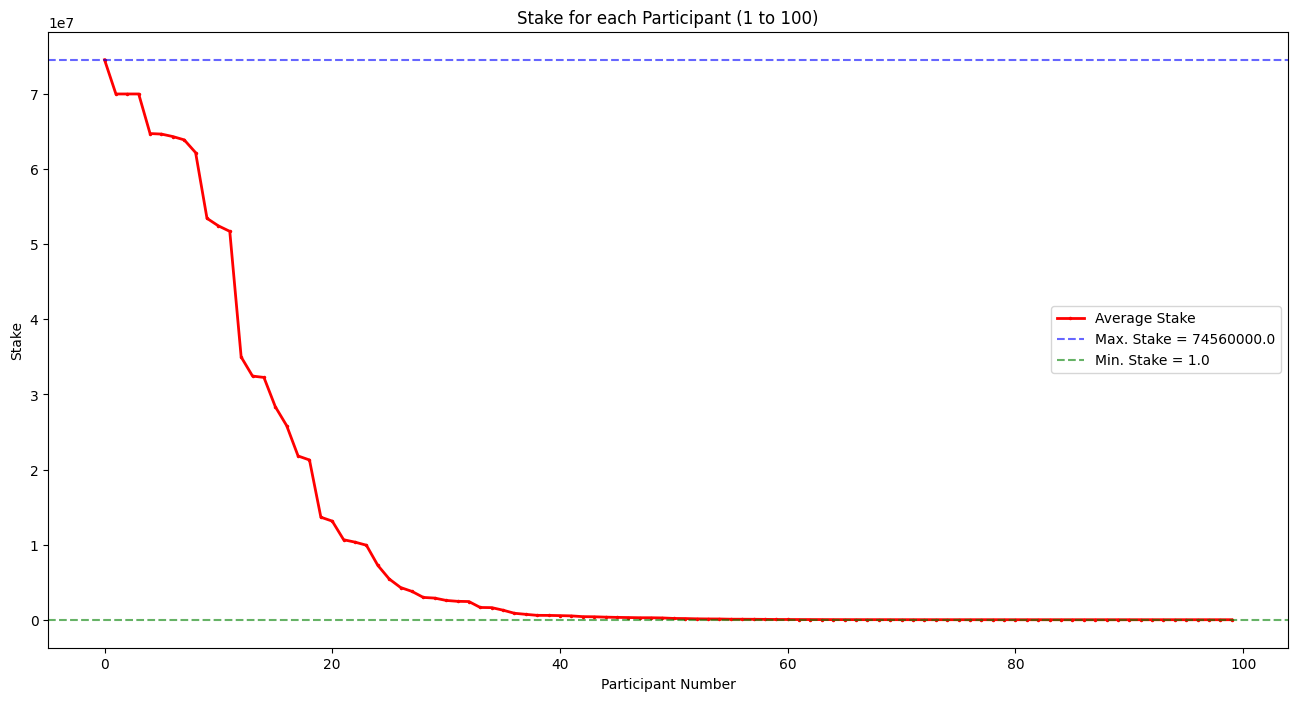

stake  stake_weight
0   74560000.0  7.017396e-02
1   70000000.0  6.588221e-02
2   70000000.0  6.588221e-02
3   70000000.0  6.588221e-02
4   64730000.0  6.092222e-02
..         ...           ...
95        23.0  2.164701e-08
96        18.0  1.694114e-08
97         8.0  7.529395e-09
98         2.0  1.882349e-09
99         1.0  9.411744e-10

[100 rows x 2 columns]

In [ ]:
# %%

# Let's now sample a group of participants from the population
# and calculate the stake weight for each participant.

group_size = 100

group_stakes = get_stake_distribution(
    population,
    group_size=100,
    num_iter=1,
)
group_stakes

In [ ]:
# %%

group_stakes.describe()

stake  stake_weight
count  1.000000e+02  1.000000e+02
mean   1.062502e+07  1.000000e-02
std    2.114452e+07  1.990068e-02
min    1.000000e+00  9.411744e-10
25%    2.867500e+03  2.698818e-06
50%    2.037500e+05  1.917643e-04
75%    5.882500e+06  5.536458e-03
max    7.456000e+07  7.017396e-02

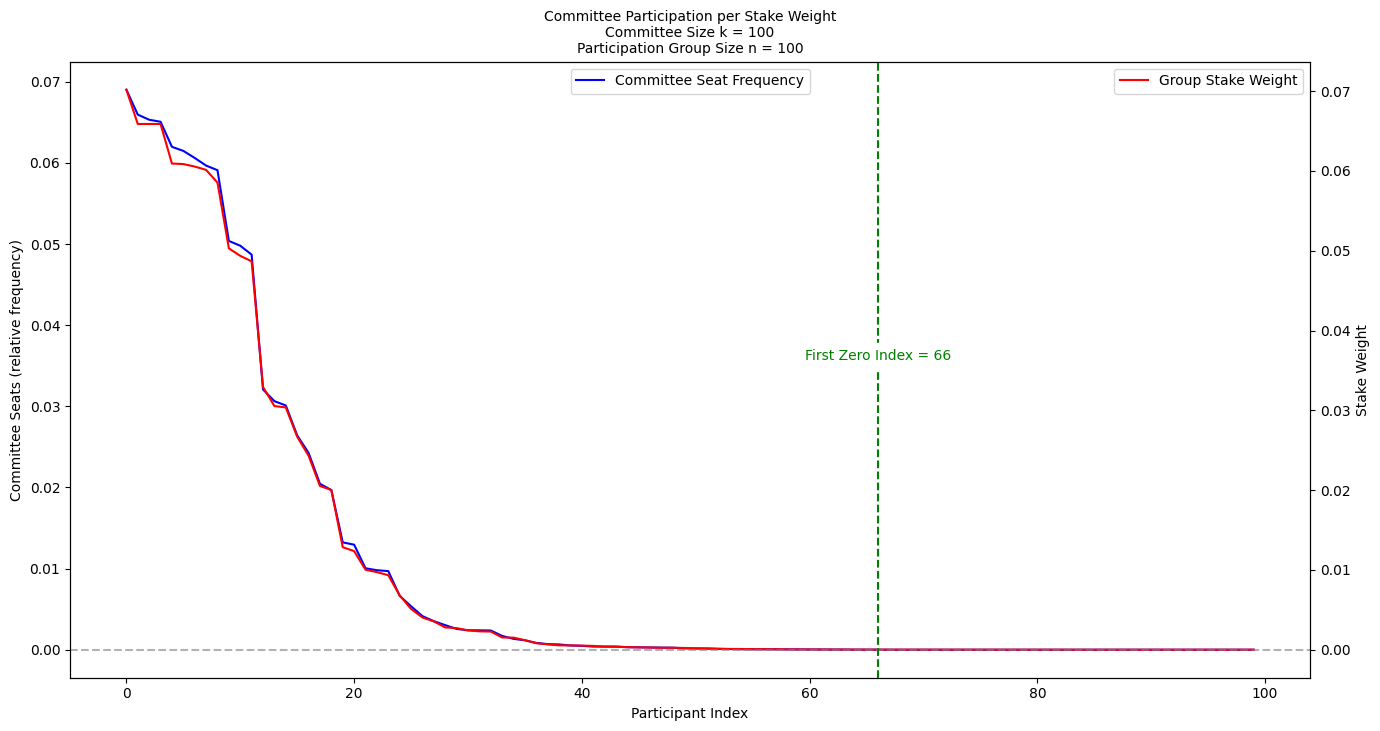

In [ ]:
# %%

# Let's now assign a committee of the fixed group_size
# based on the stake weight of each

committee, seat_counts, first_zero_index = assign_commitee(
    group_stakes,
    committee_size=group_size,
    num_iter=1000,
)

In [ ]:
# %%

print("Committee")  # Participants selected for the committee
print(committee)
print("\nSeat Counts")  # Number of times each participant is selected
print(seat_counts)
print("\nFirst Zero Index")  # Index where the seat count first goes to zero
print(first_zero_index)

Committee
         stake  stake_weight
12  34980000.0      0.032922
7   63890000.0      0.060132
8   62190000.0      0.058532
19  13650000.0      0.012847
5   64660000.0      0.060856
..         ...           ...
6   64330000.0      0.060546
11  51710000.0      0.048668
8   62190000.0      0.058532
2   70000000.0      0.065882
5   64660000.0      0.060856

[100 rows x 2 columns]

Seat Counts
0     0.06903
3     0.06596
2     0.06533
1     0.06508
6     0.06199
       ...   
69    0.00000
68    0.00000
66    0.00000
64    0.00000
99    0.00000
Name: relative frequency, Length: 100, dtype: float64

First Zero Index
66


In [ ]:
# %%

# Let's now create a plots of committee assignments where we vary
# the group size over {100, 200, 300, 400, 500} and see how the
# committee selection and seat count changes.

# Initialize Parameters:
comm_sizes = [100, 200, 300, 400, 500]  # vary over committee size, k
group_sizes = [100, 200, 300, 400, 500]  # vary over group size, n
num_iter = 1000  # Number of iterations for Monte Carlo simulation
# Note that the number of iterations here can be interpreted as the number
# of selection rounds for the committee, which we call an epoch.
# If we have a new epoch per day, then 1000 iterations is about 3 years.

# Collect the selection count values
# for each group size, keyed by committee size
committee_seats = {}

# Initialize an array to store the first zero index
# for each committee size (row) and group size (columns)
first_zero_indices = np.zeros(
    (
        len(comm_sizes),
        len(group_sizes),
    )
)

# Initialize a DataFrame to store the seat count for each group size
selection_counts = {}

Group Size ...: 100 participants
Committee Size: 100 seats


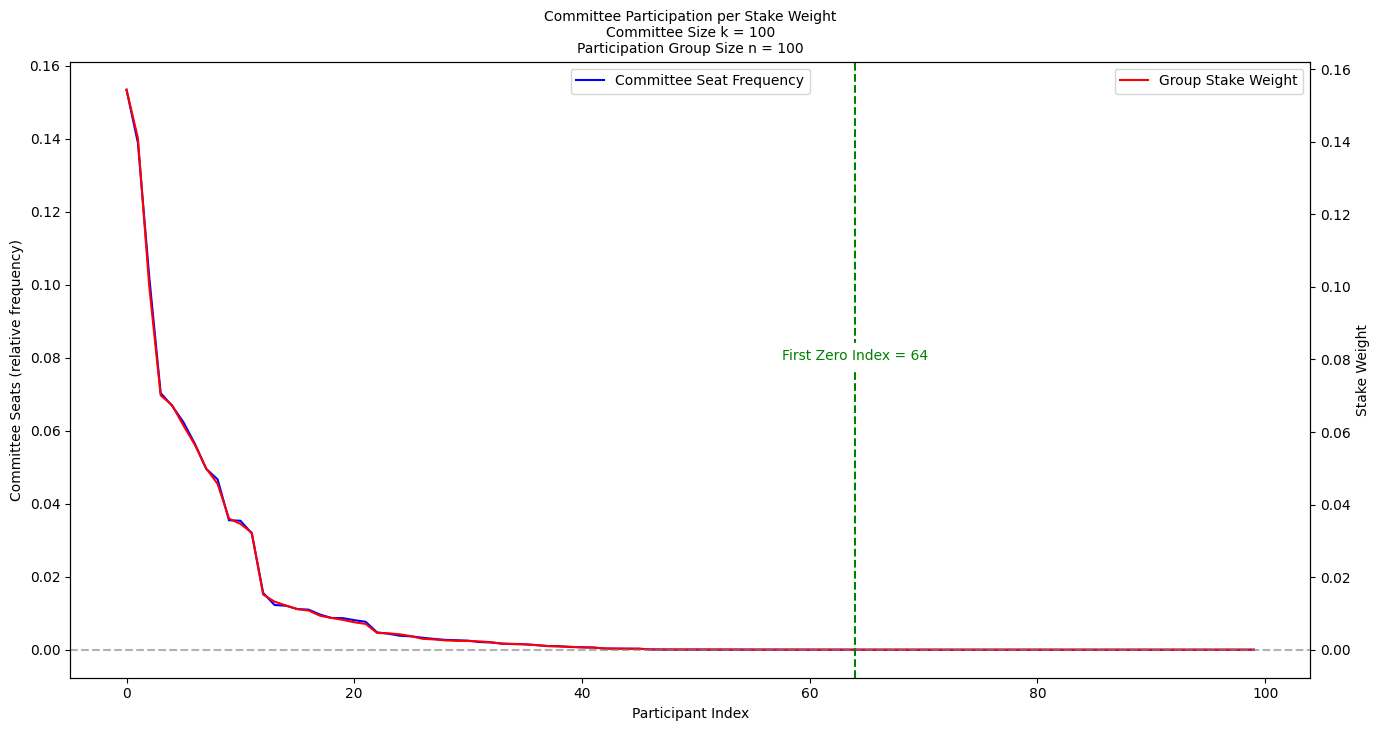

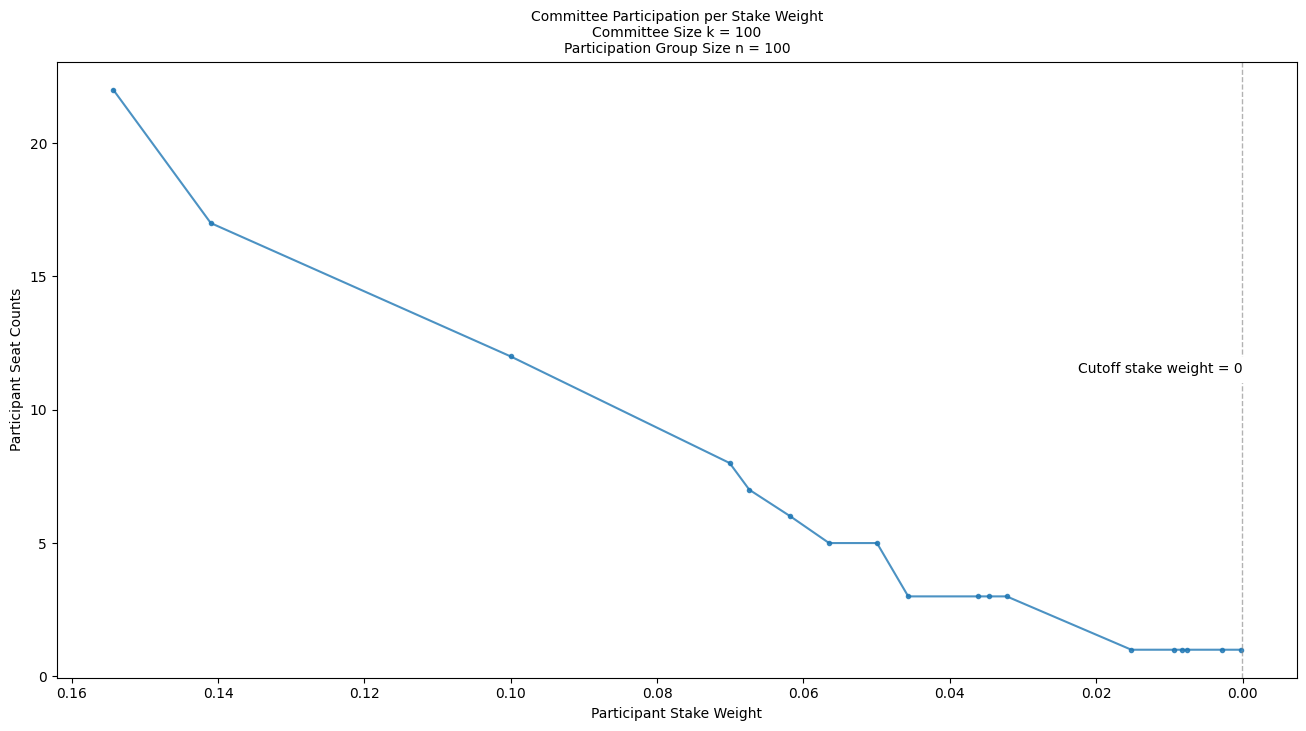

Group Size ...: 200 participants
Committee Size: 100 seats


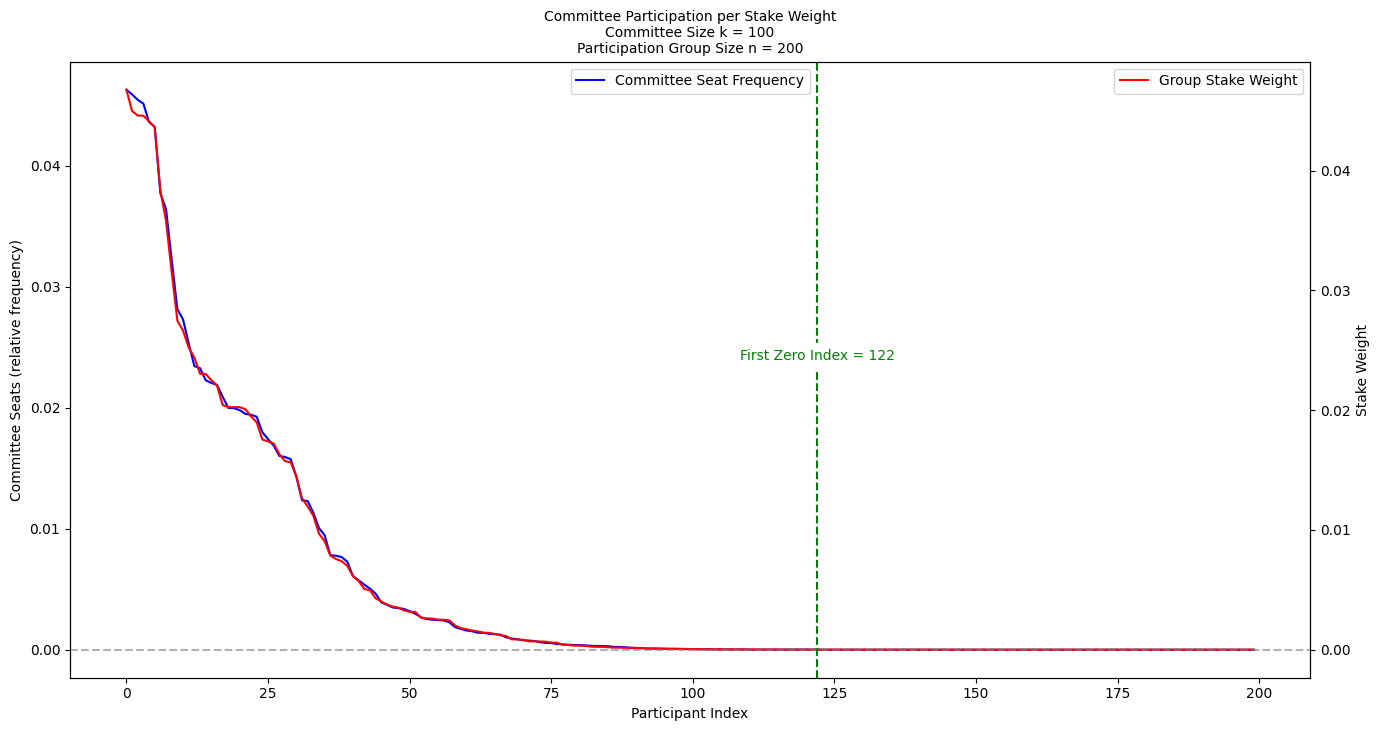

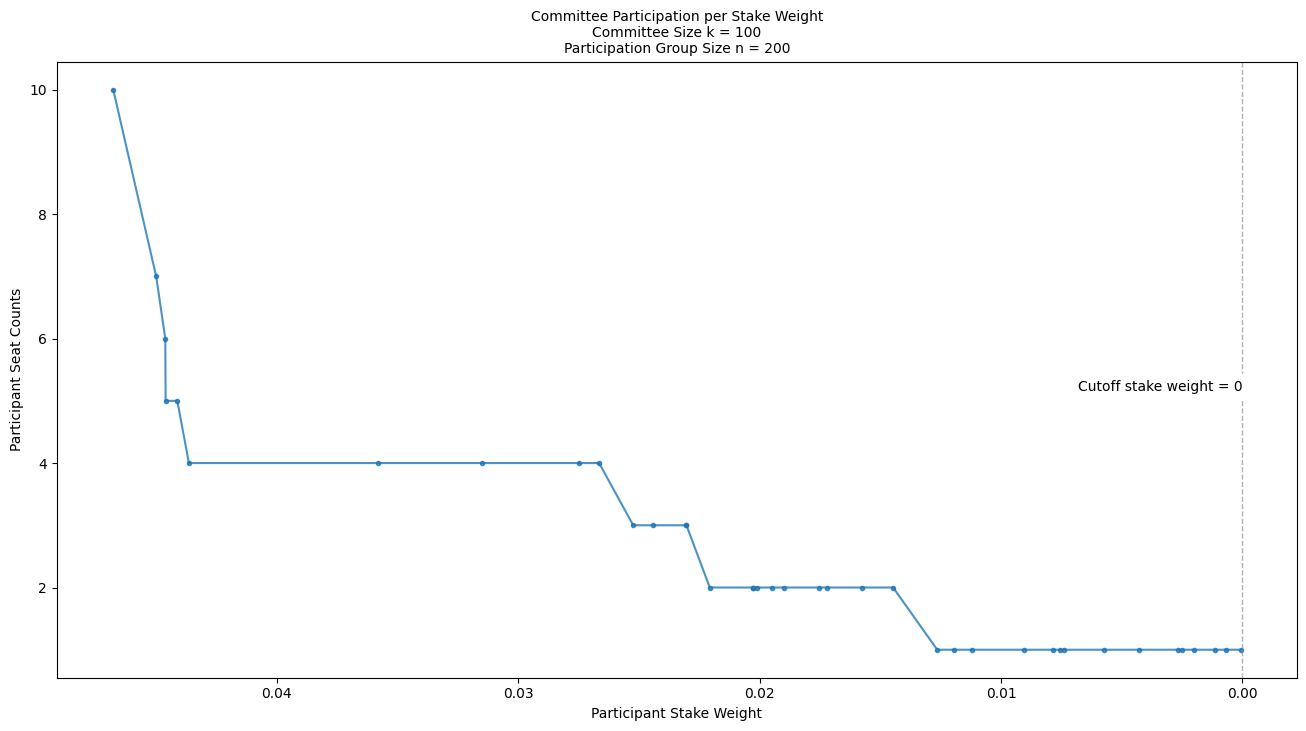

Group Size ...: 300 participants
Committee Size: 100 seats


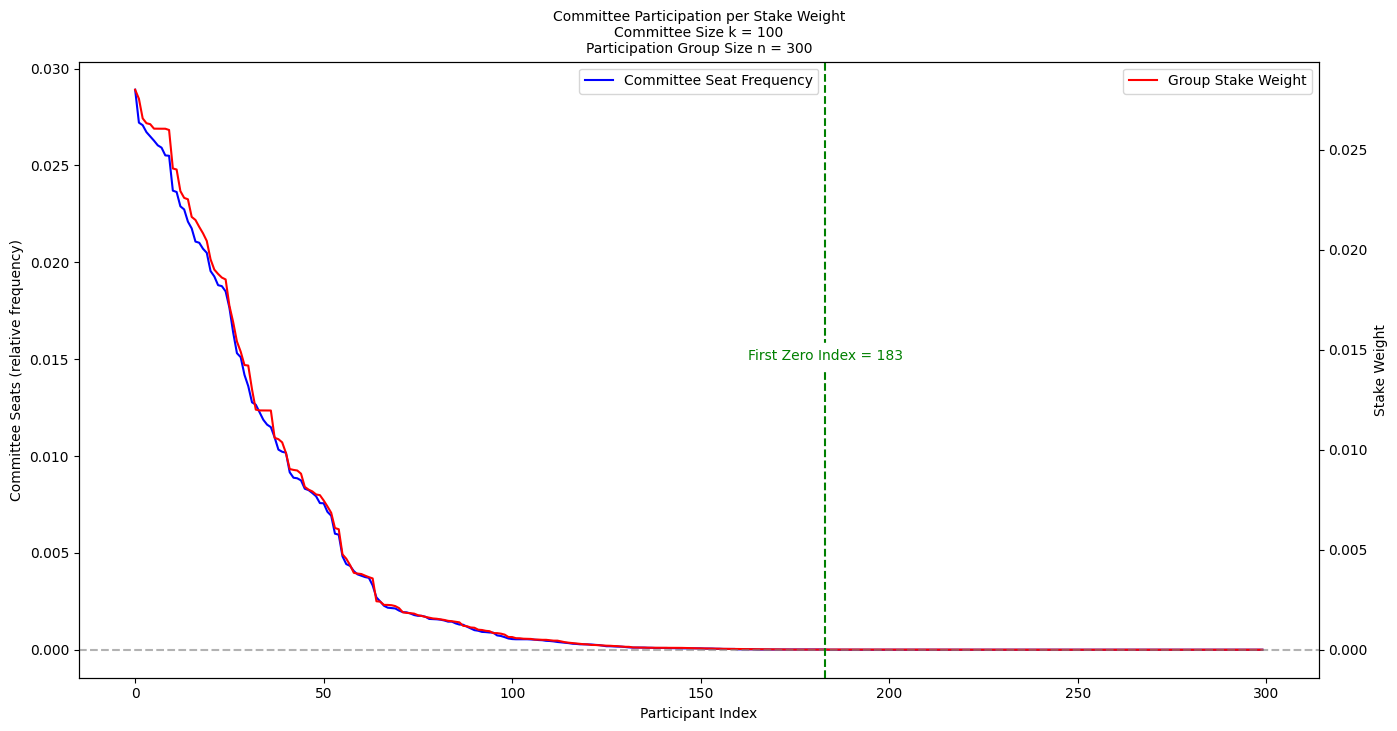

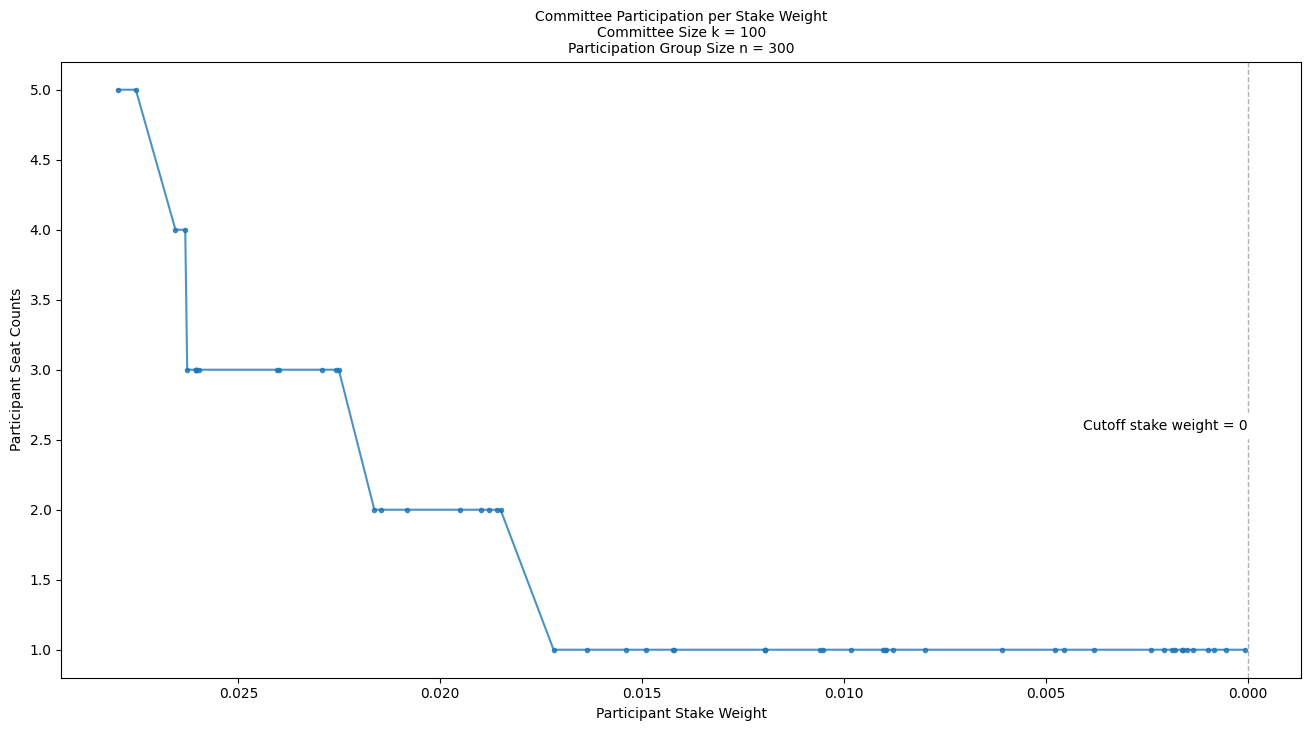

Group Size ...: 400 participants
Committee Size: 100 seats


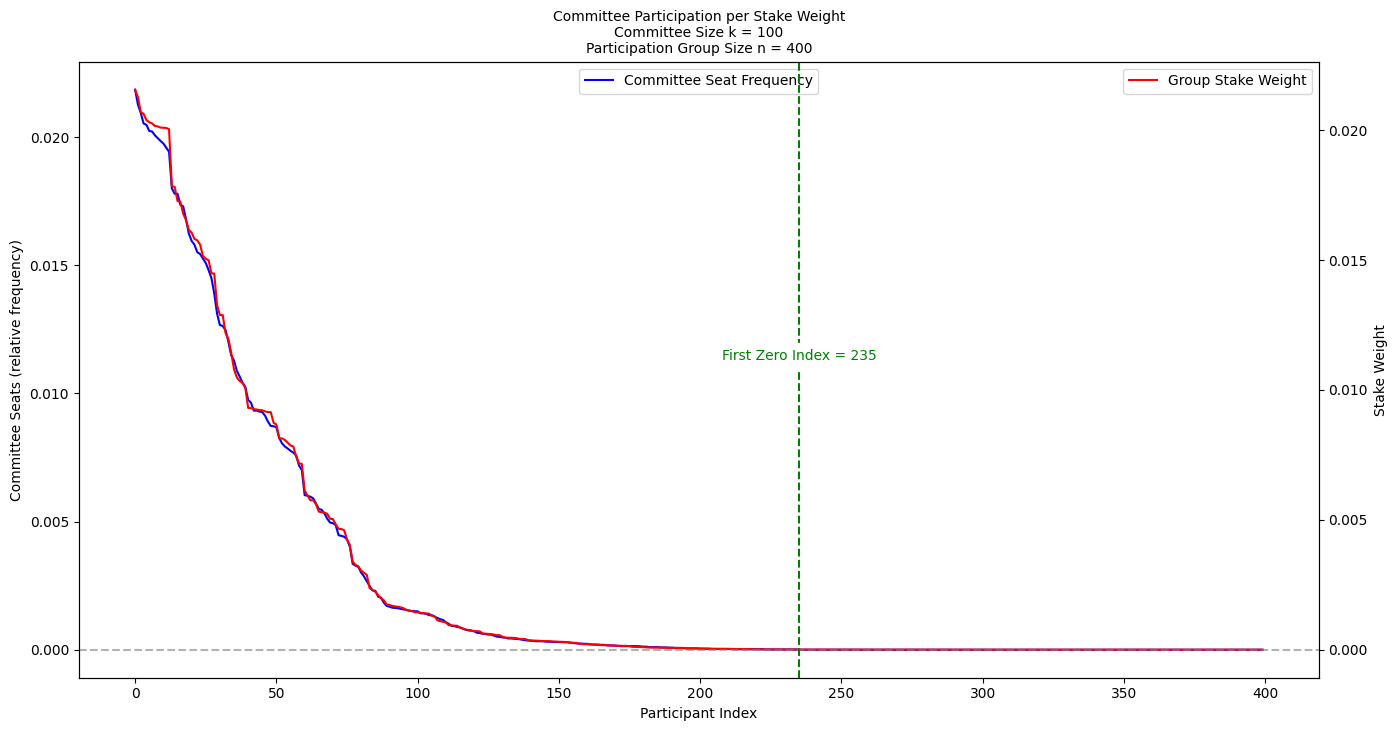

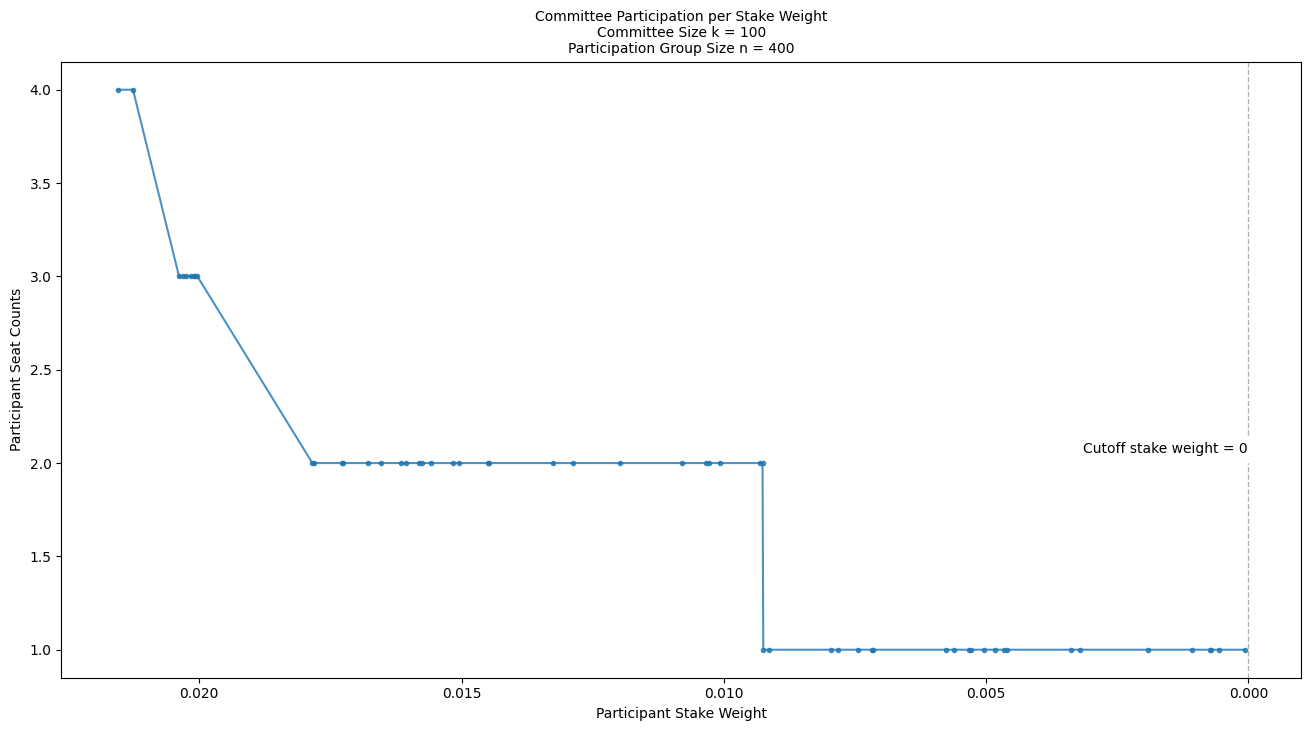

Group Size ...: 500 participants
Committee Size: 100 seats


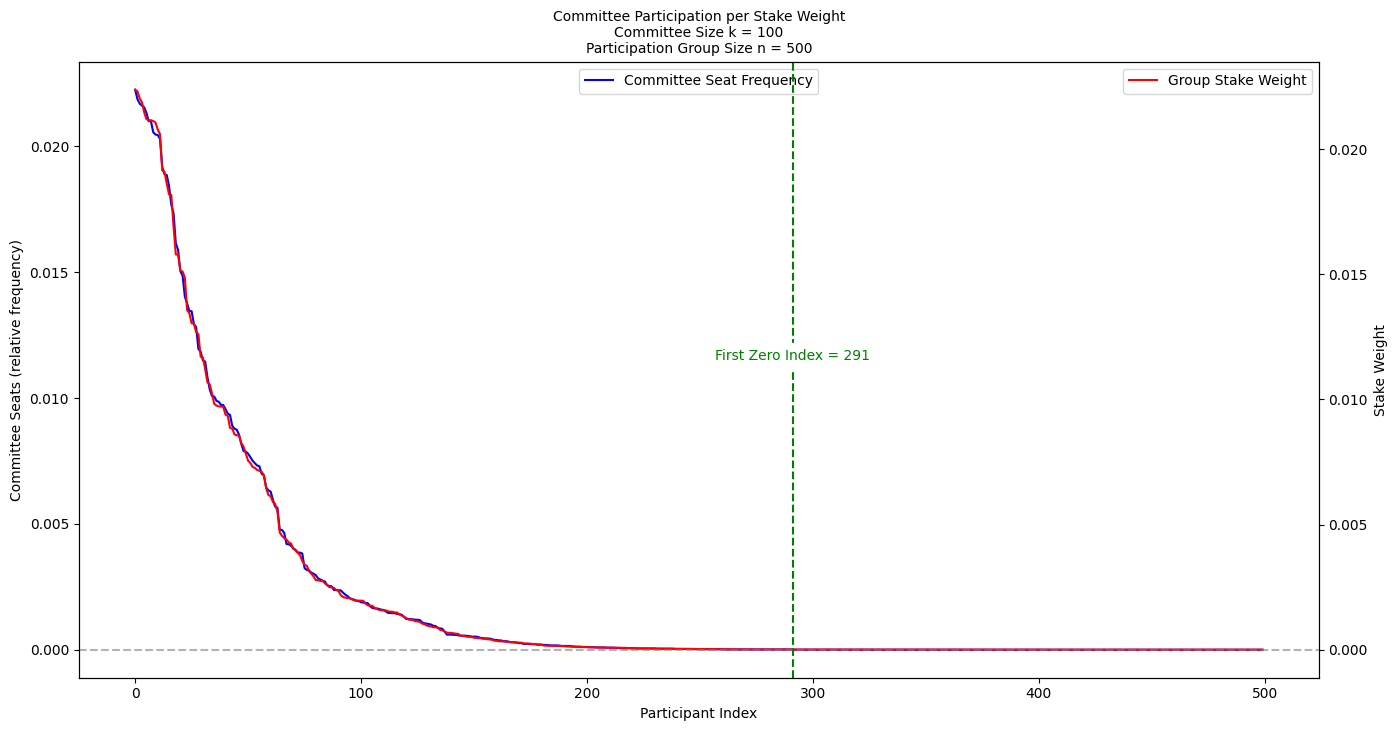

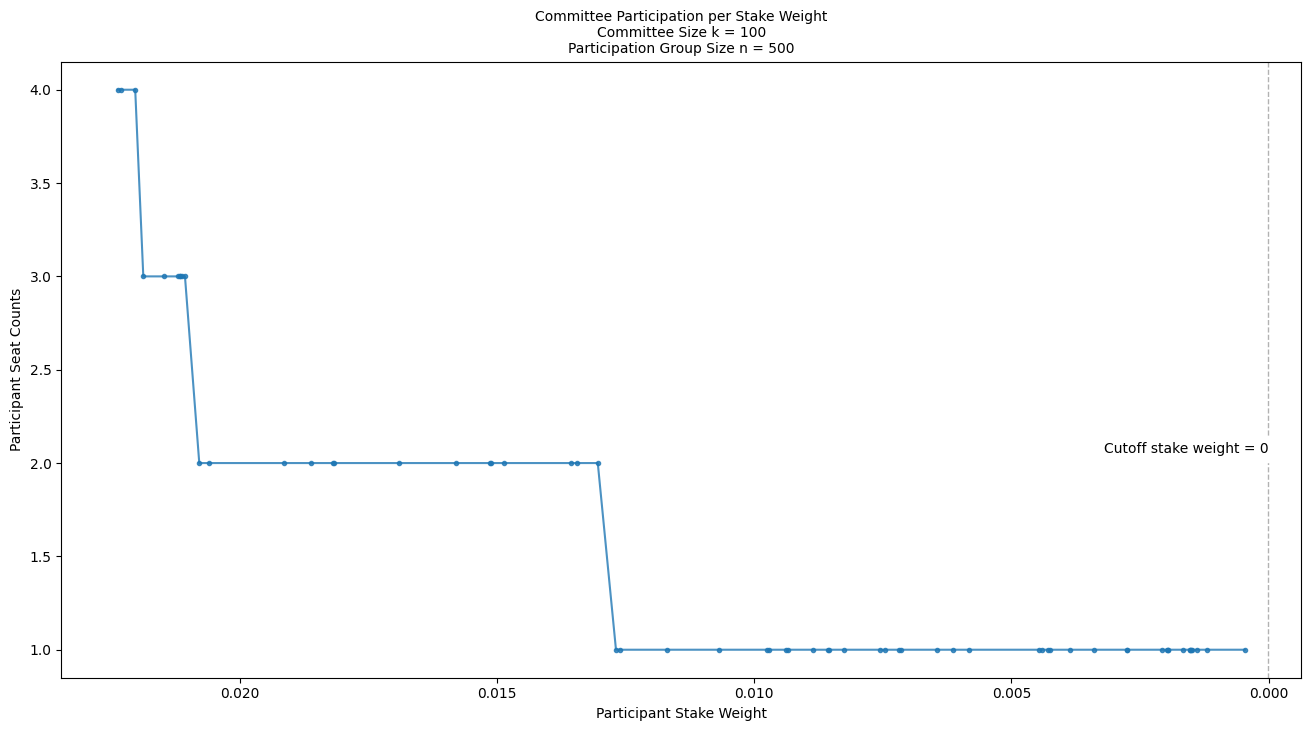

Group Size ...: 100 participants
Committee Size: 200 seats


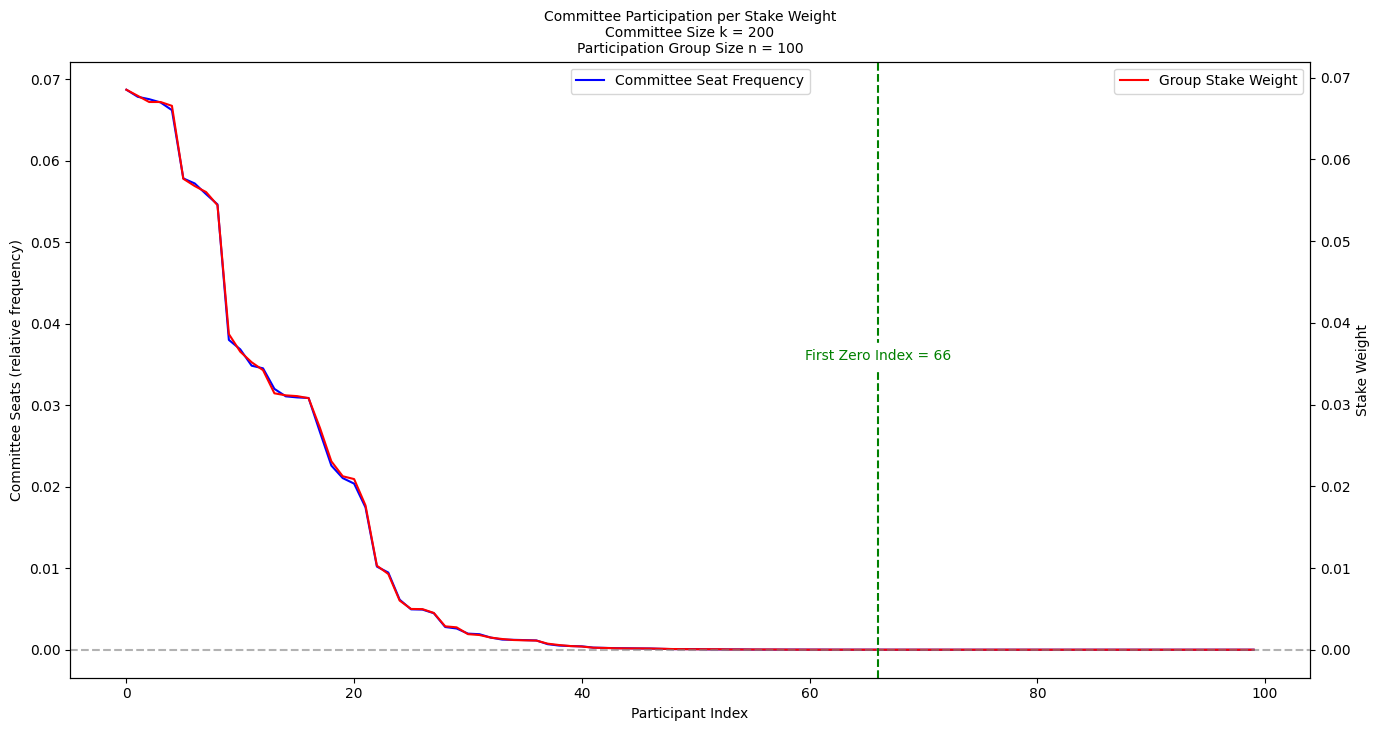

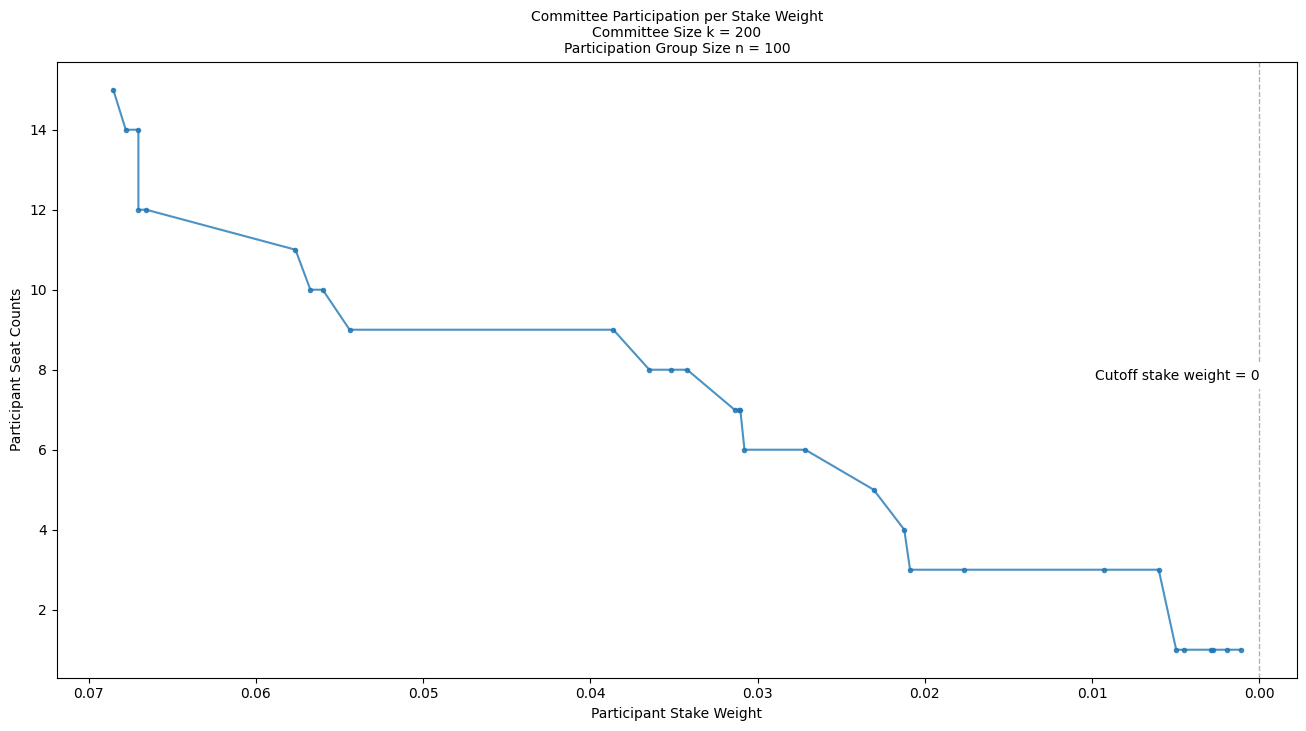

Group Size ...: 200 participants
Committee Size: 200 seats


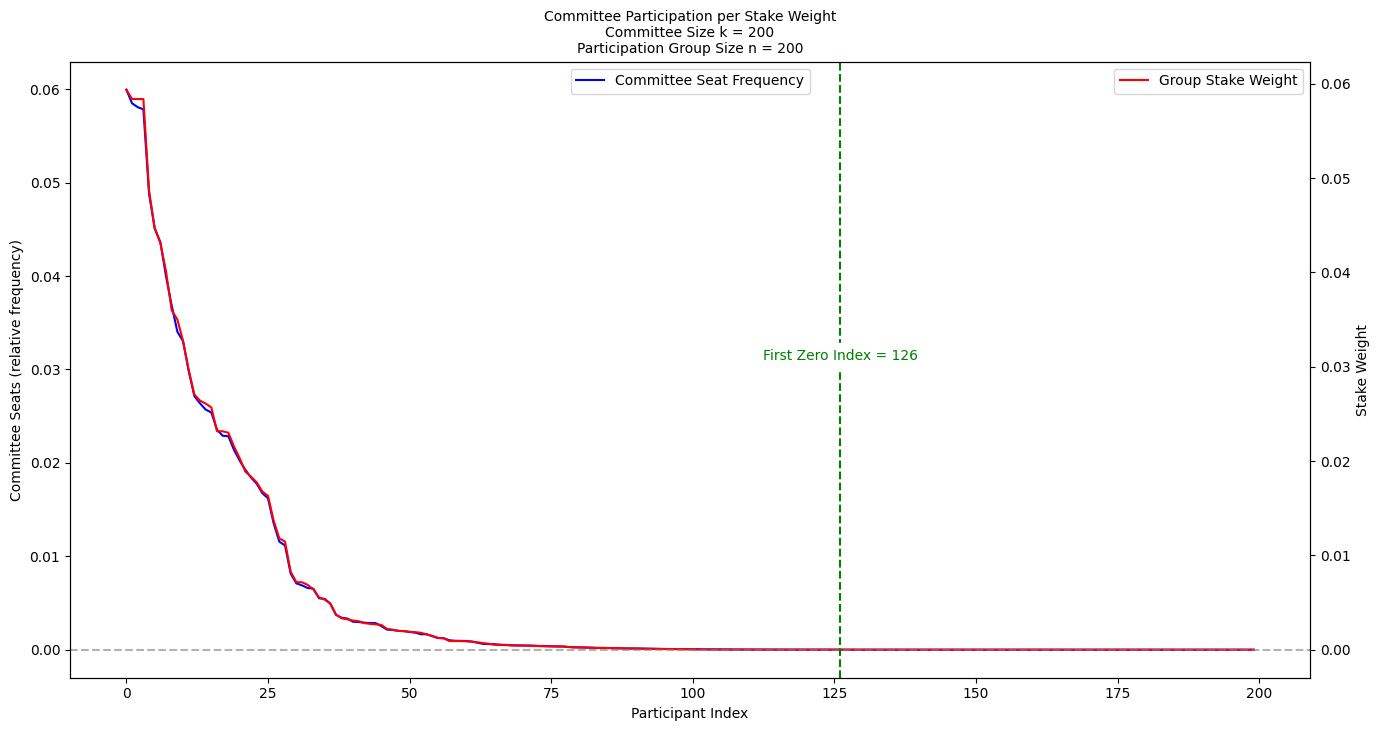

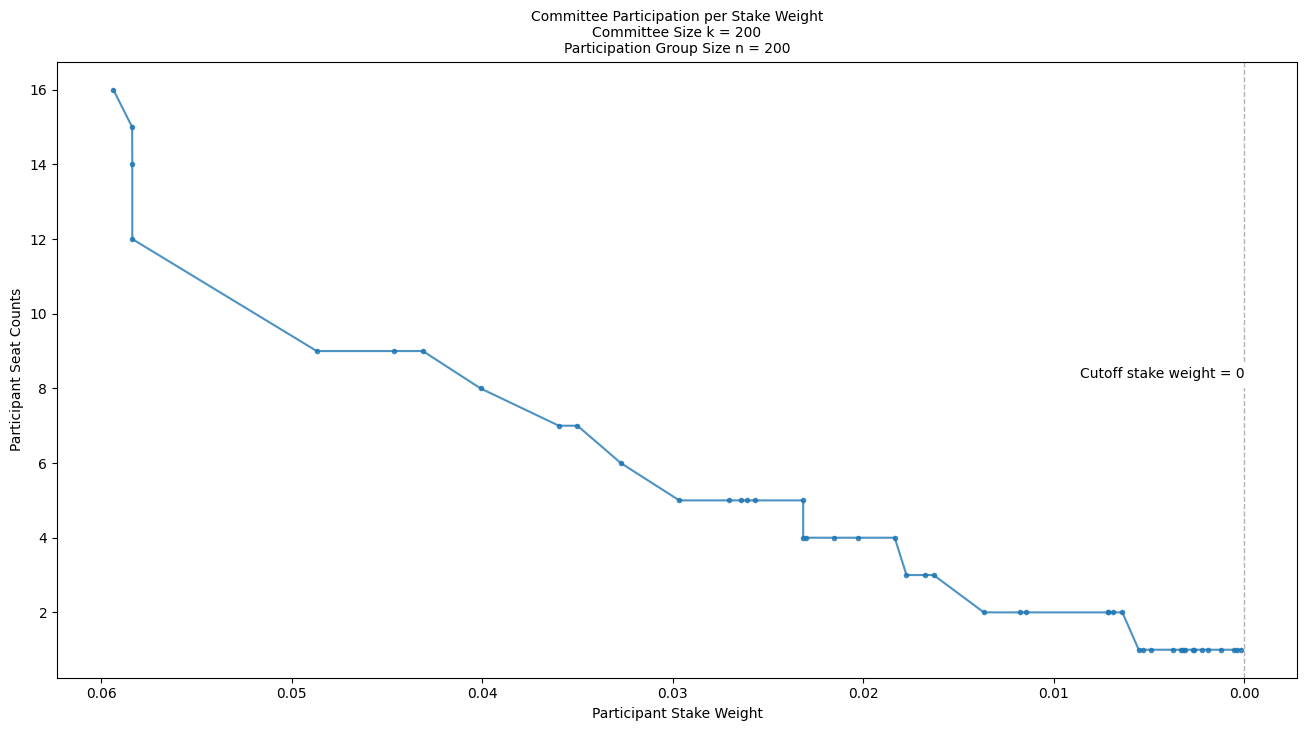

Group Size ...: 300 participants
Committee Size: 200 seats


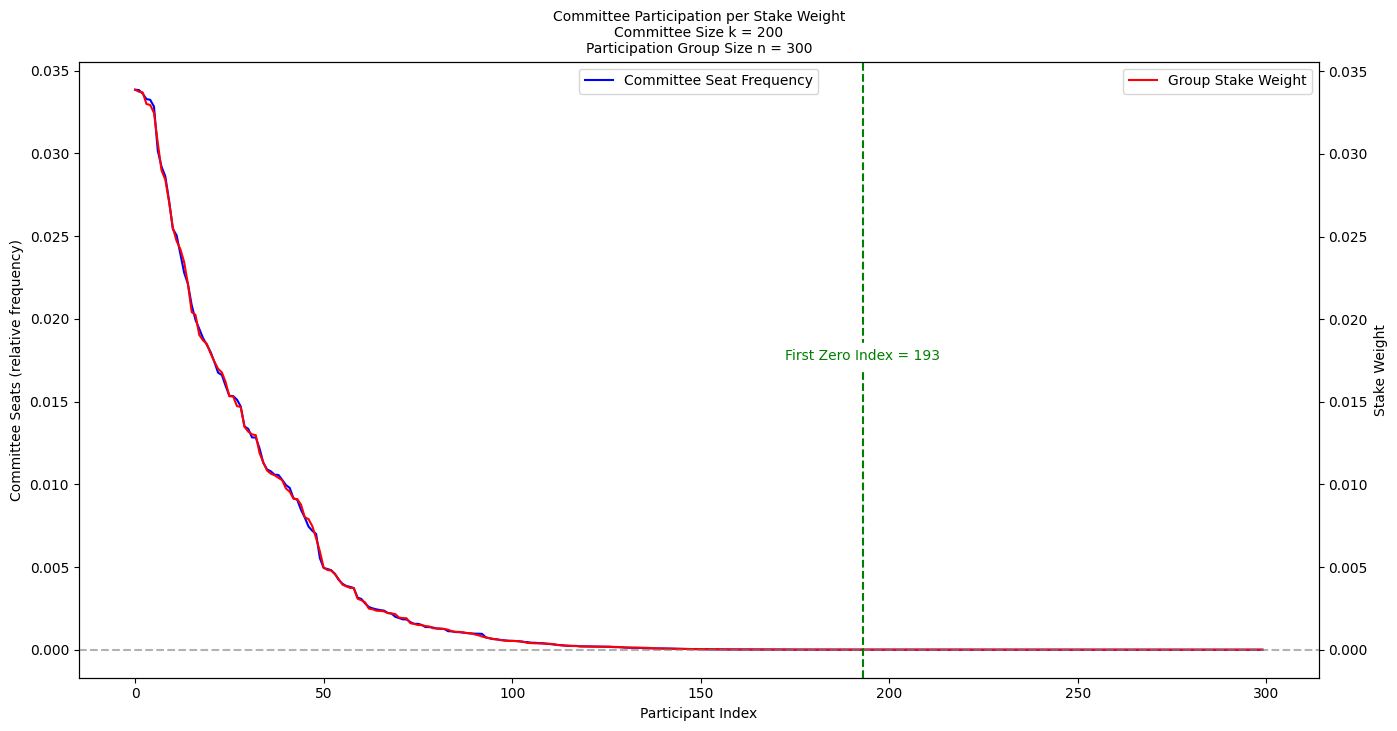

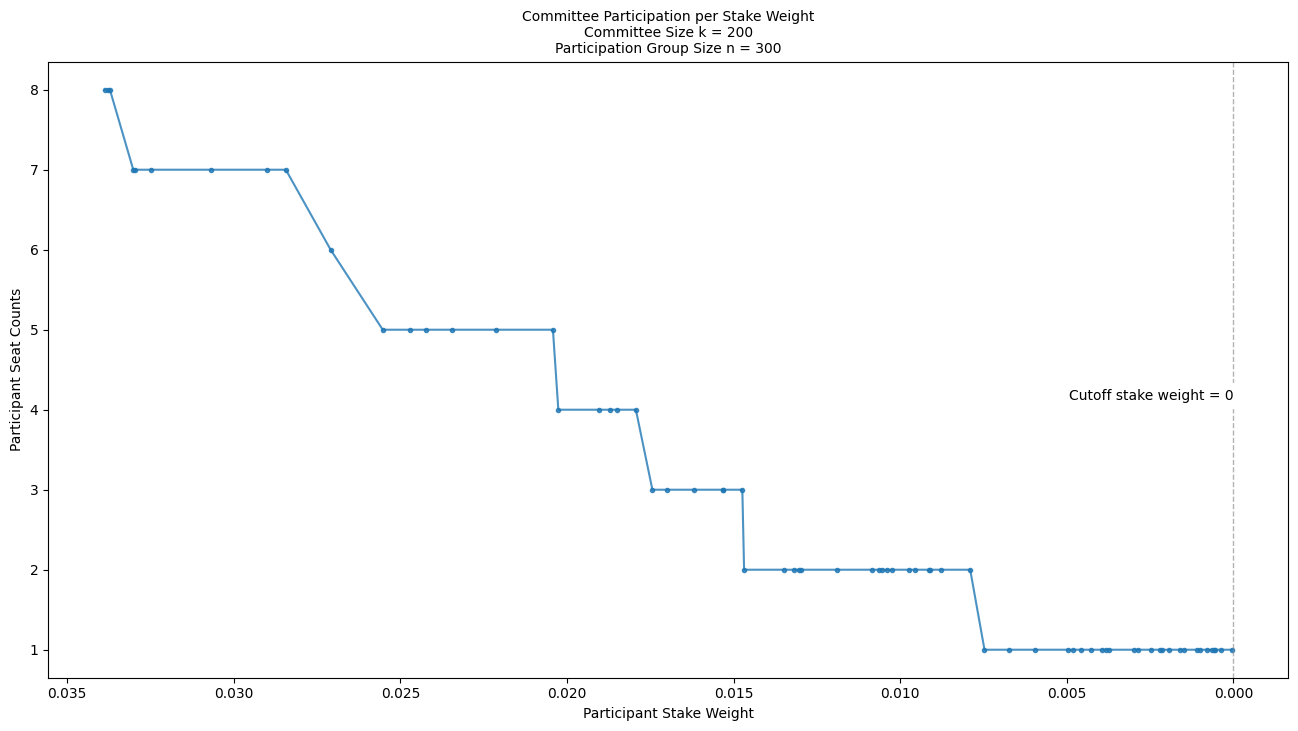

Group Size ...: 400 participants
Committee Size: 200 seats


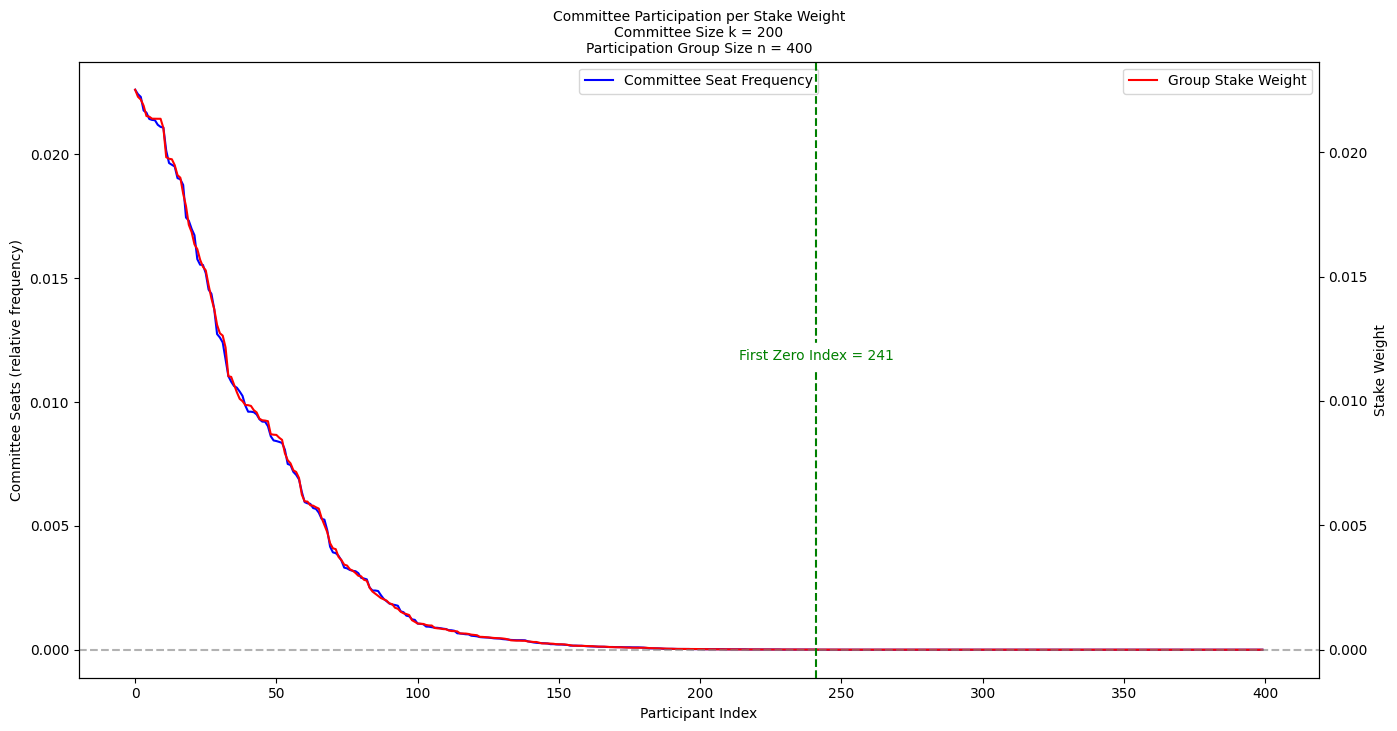

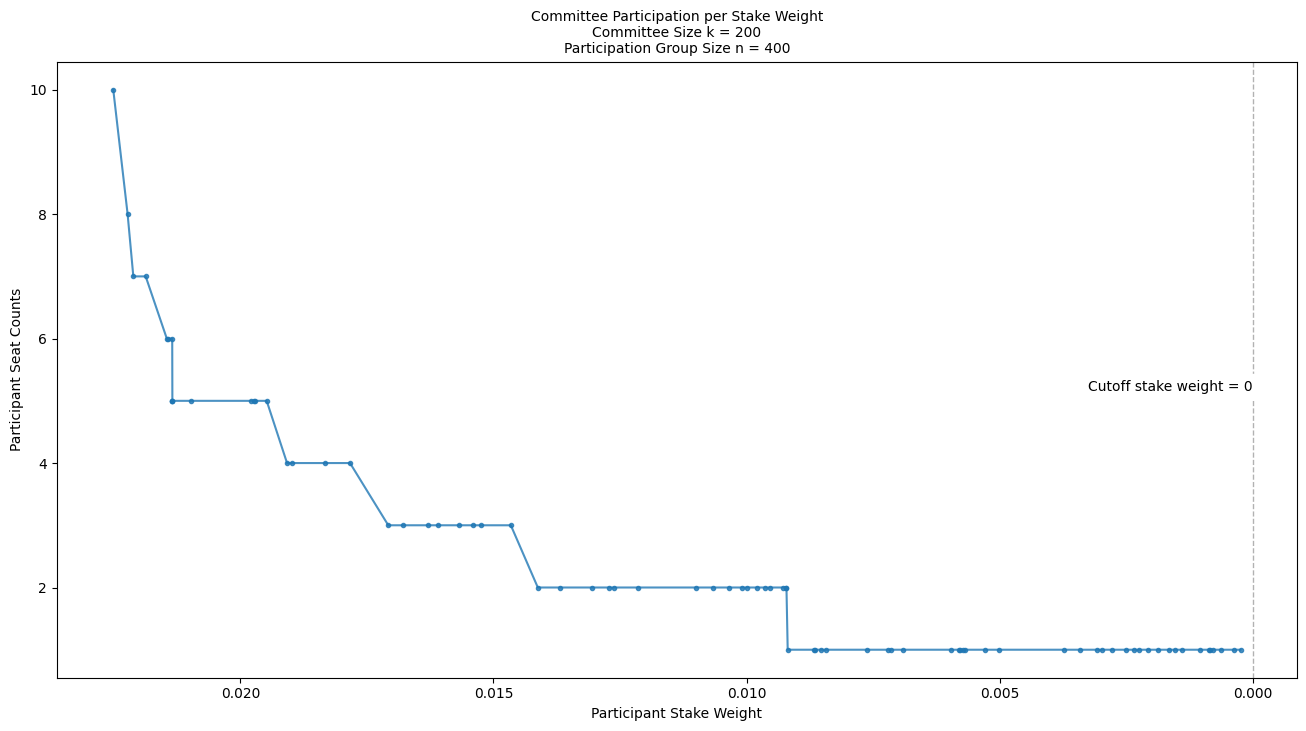

Group Size ...: 500 participants
Committee Size: 200 seats


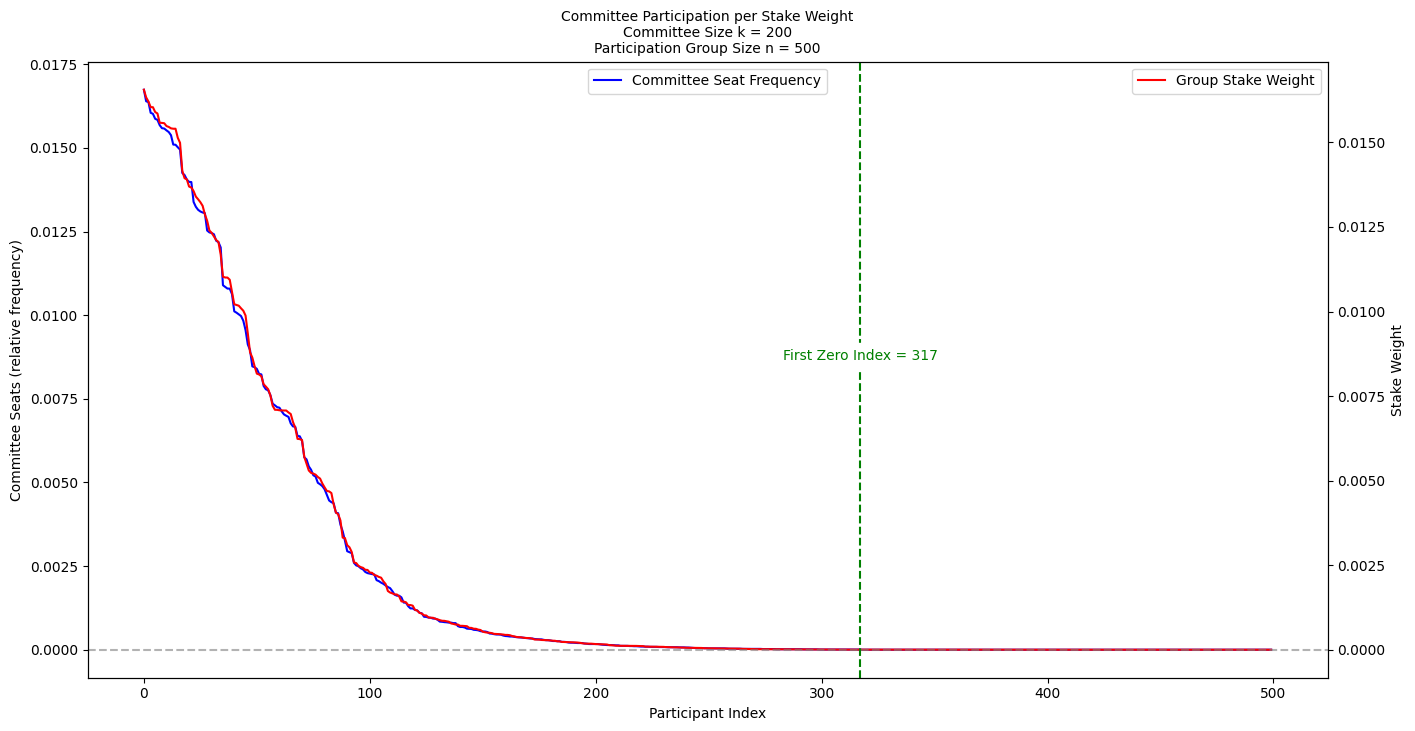

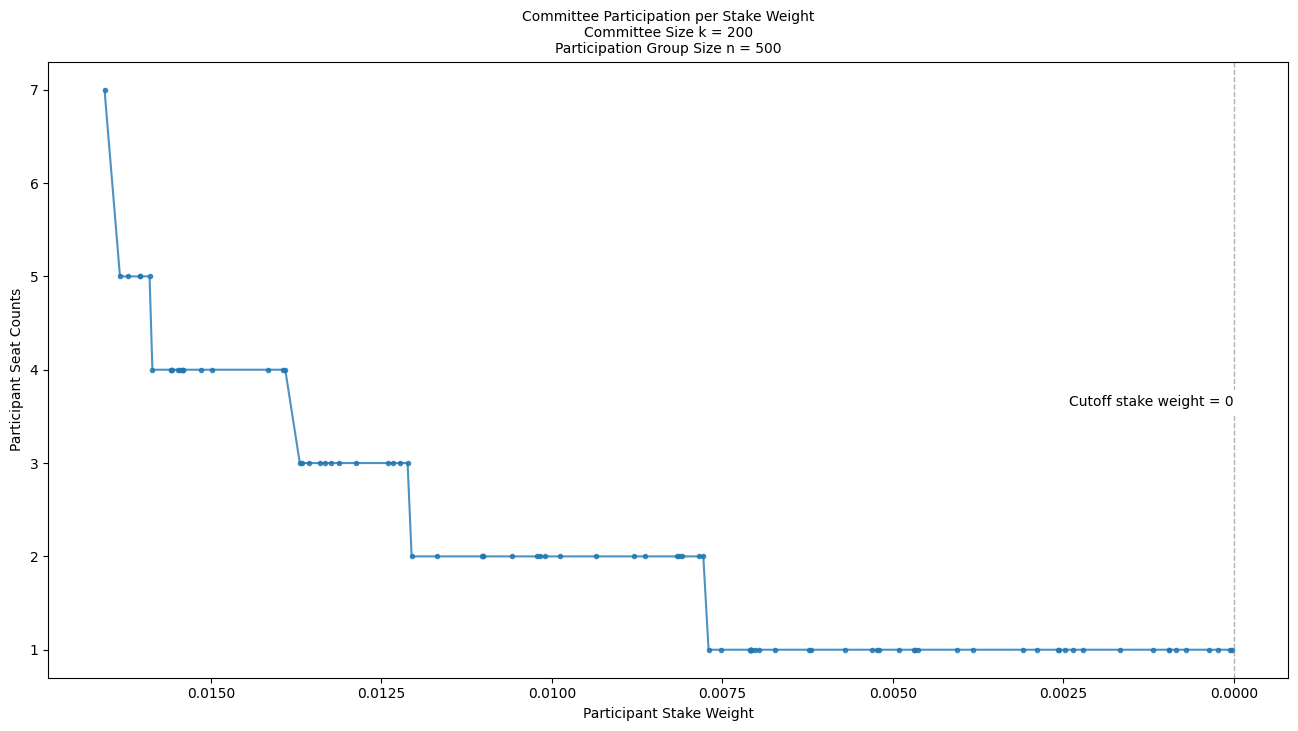

Group Size ...: 100 participants
Committee Size: 300 seats


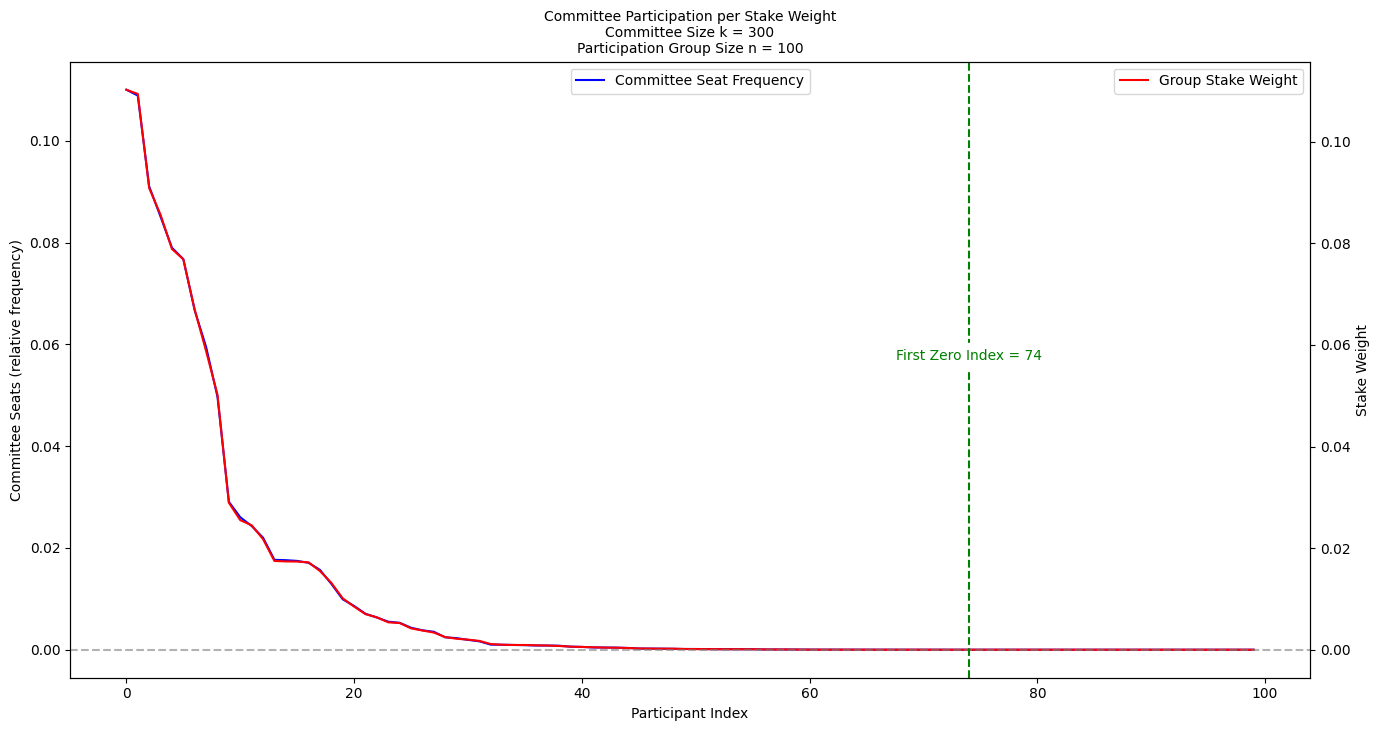

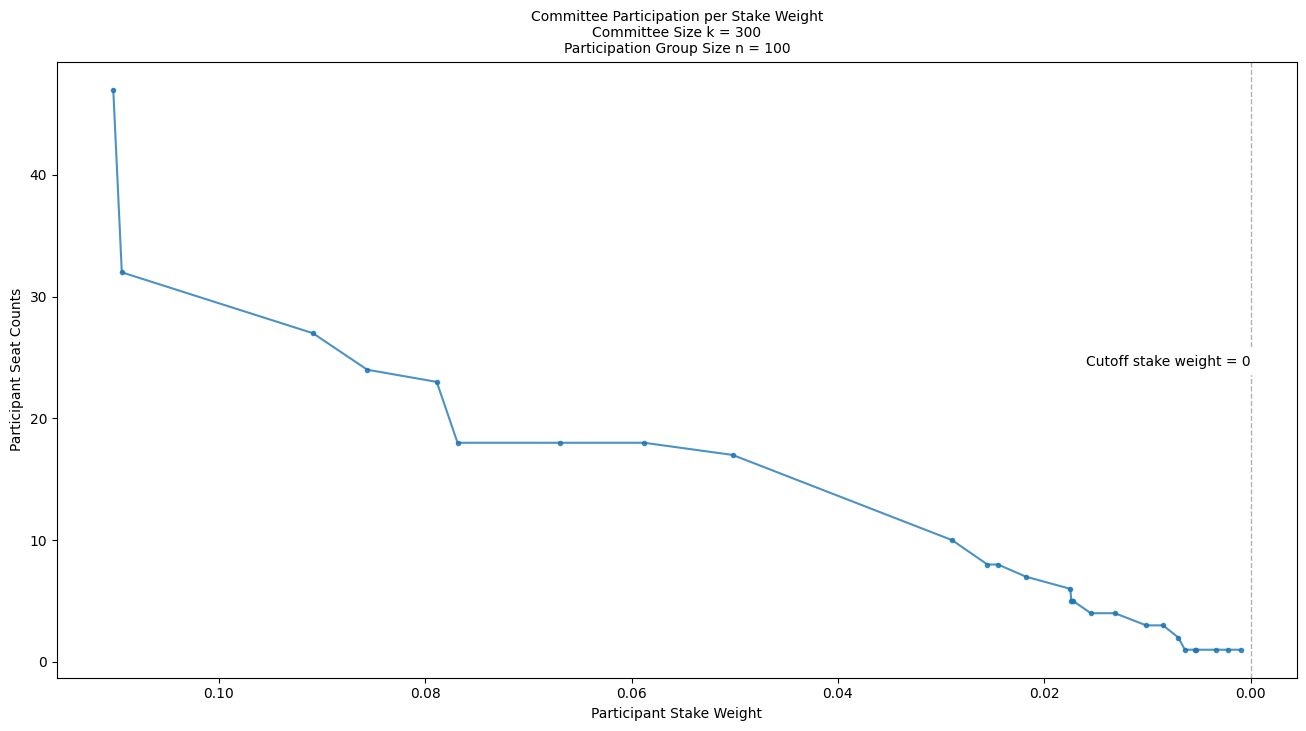

Group Size ...: 200 participants
Committee Size: 300 seats


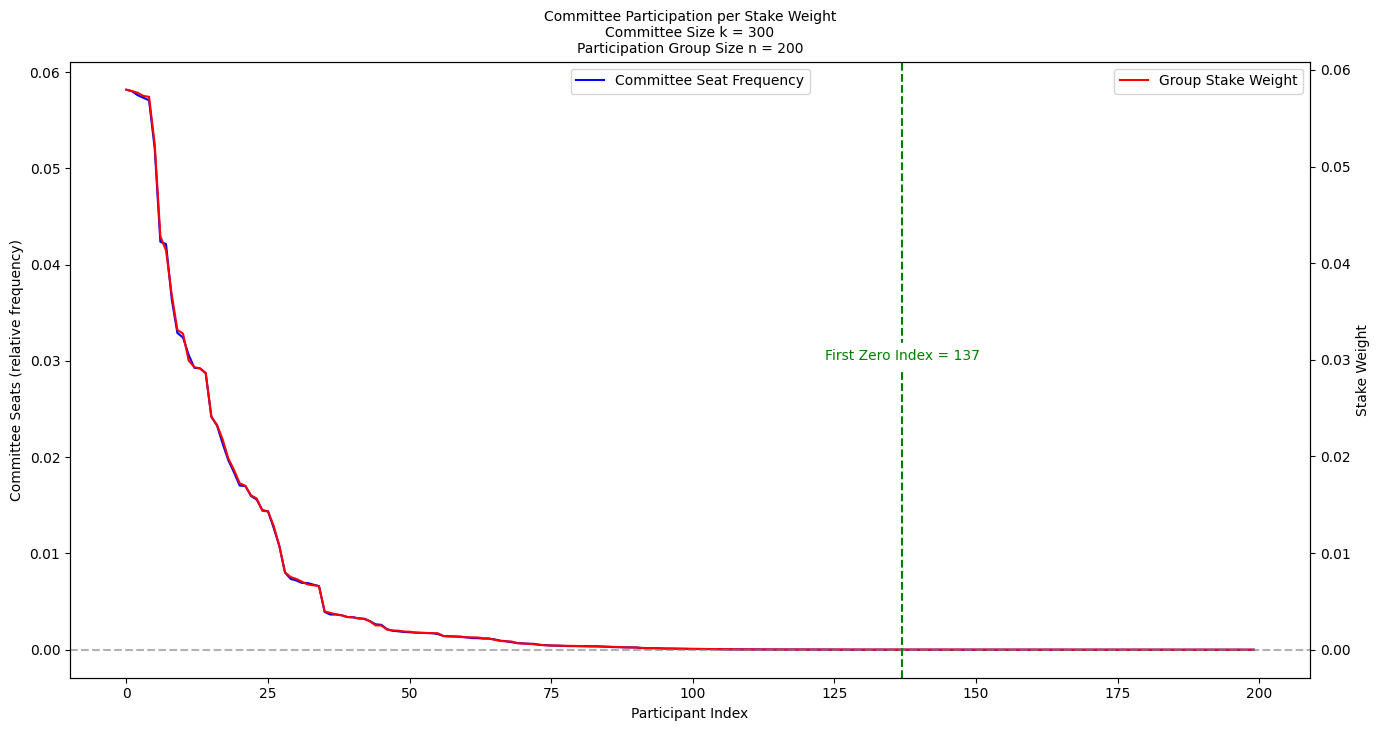

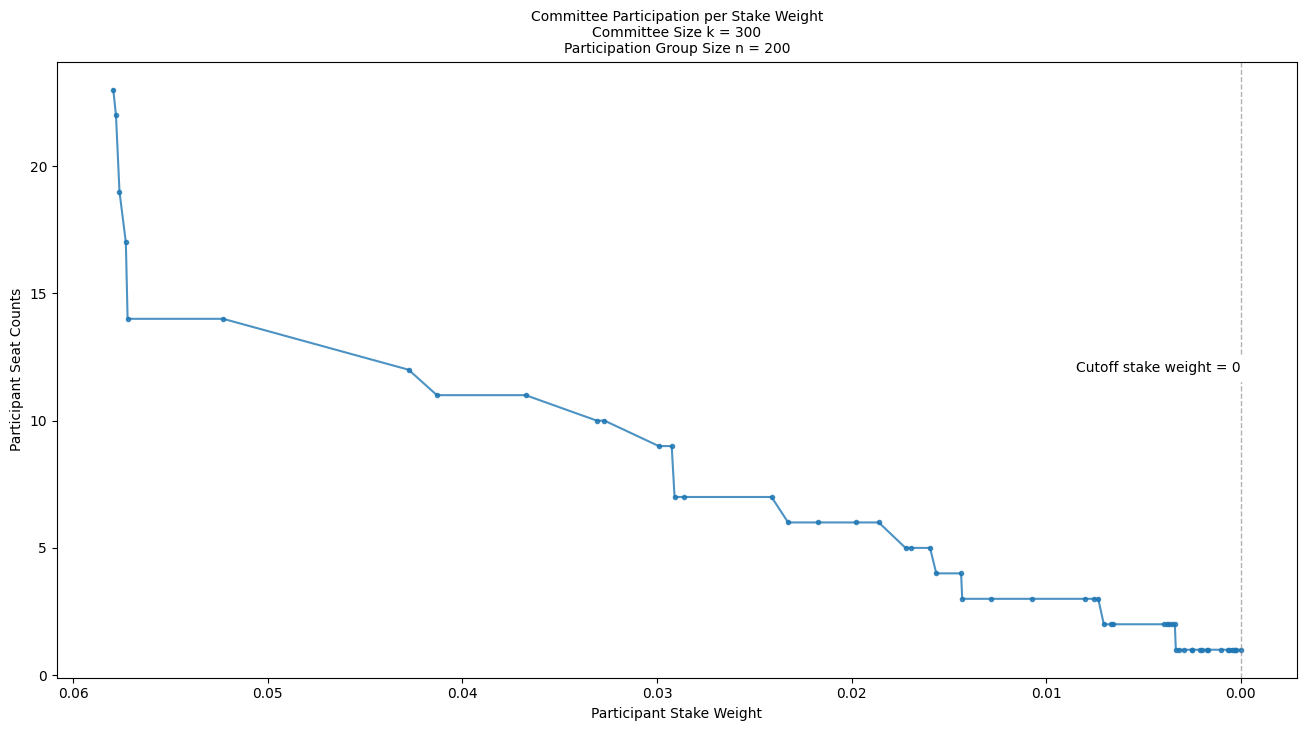

Group Size ...: 300 participants
Committee Size: 300 seats


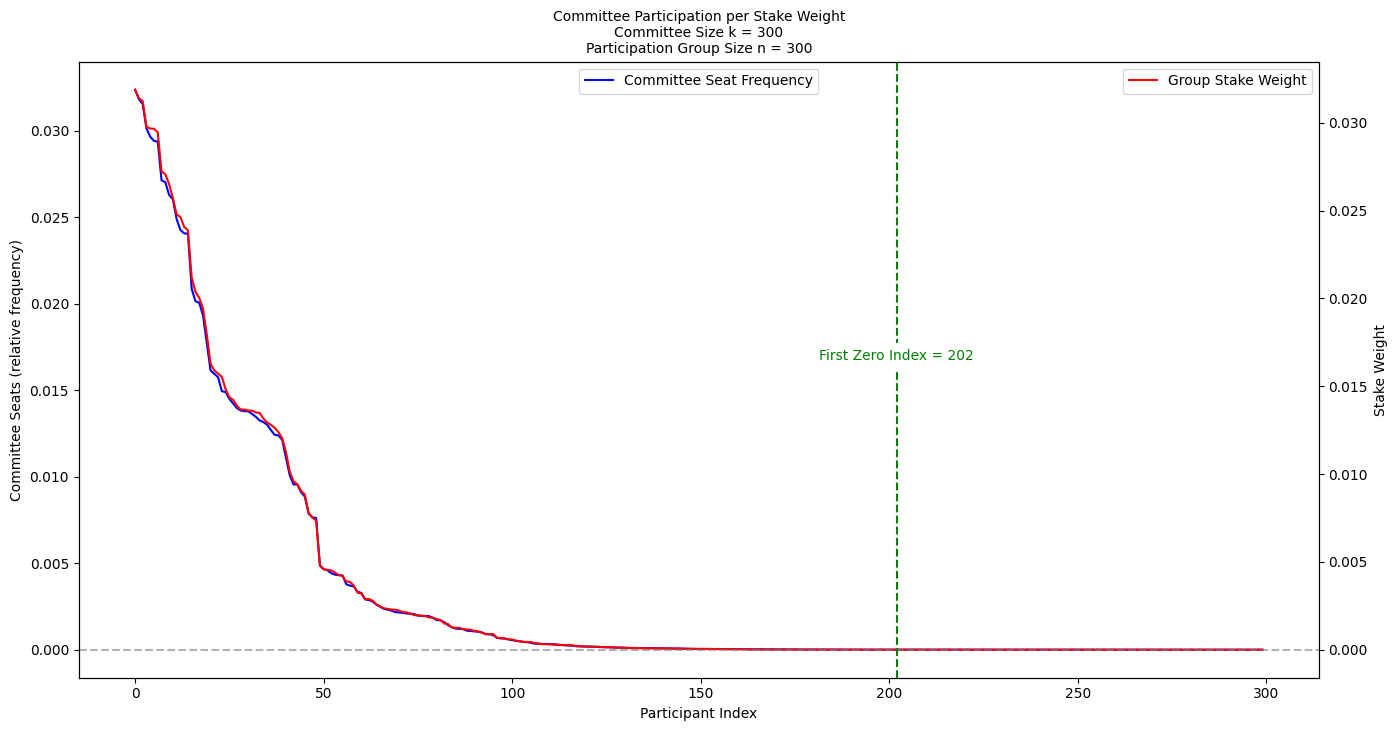

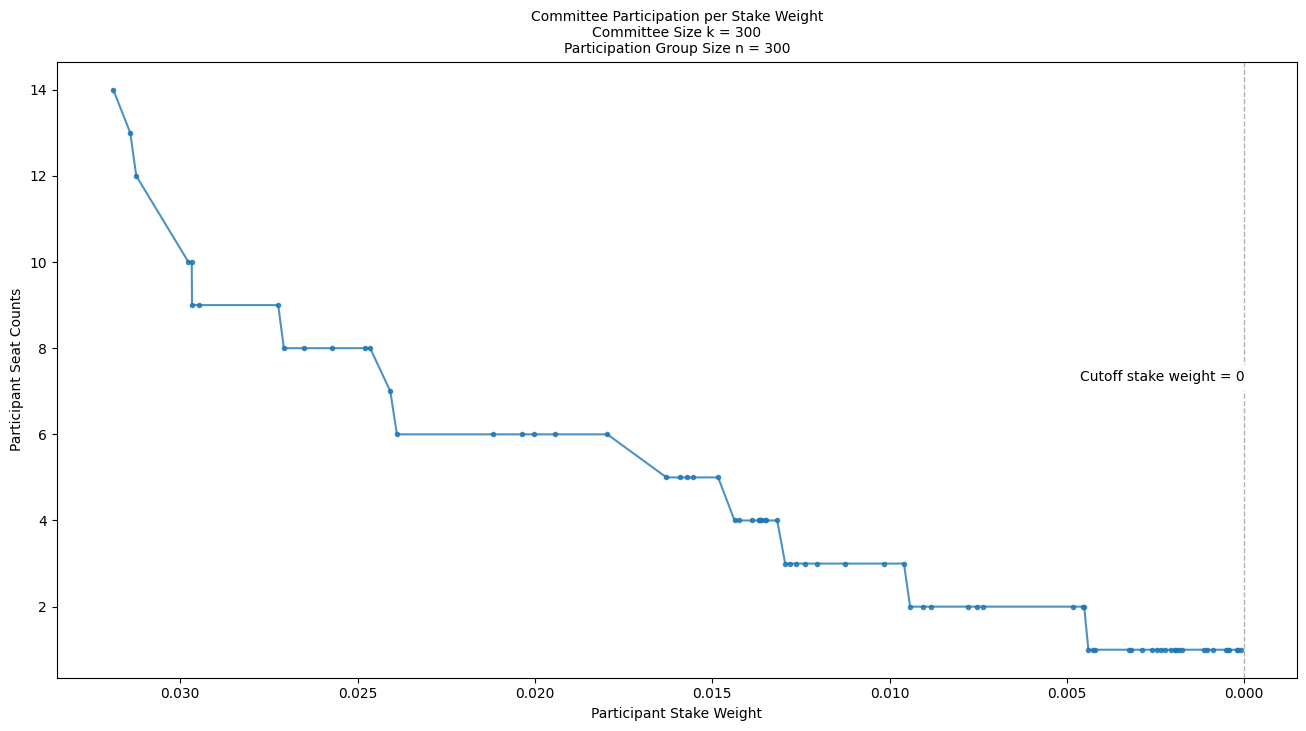

Group Size ...: 400 participants
Committee Size: 300 seats


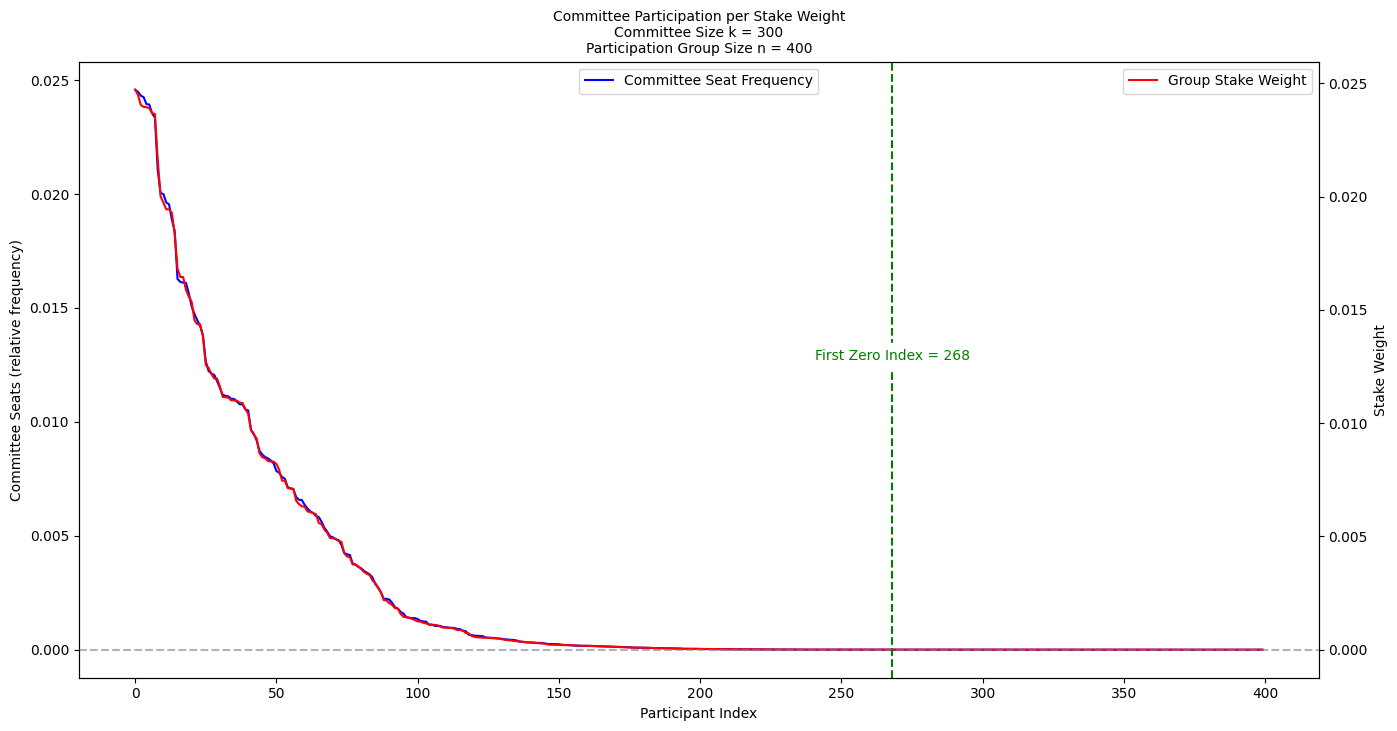

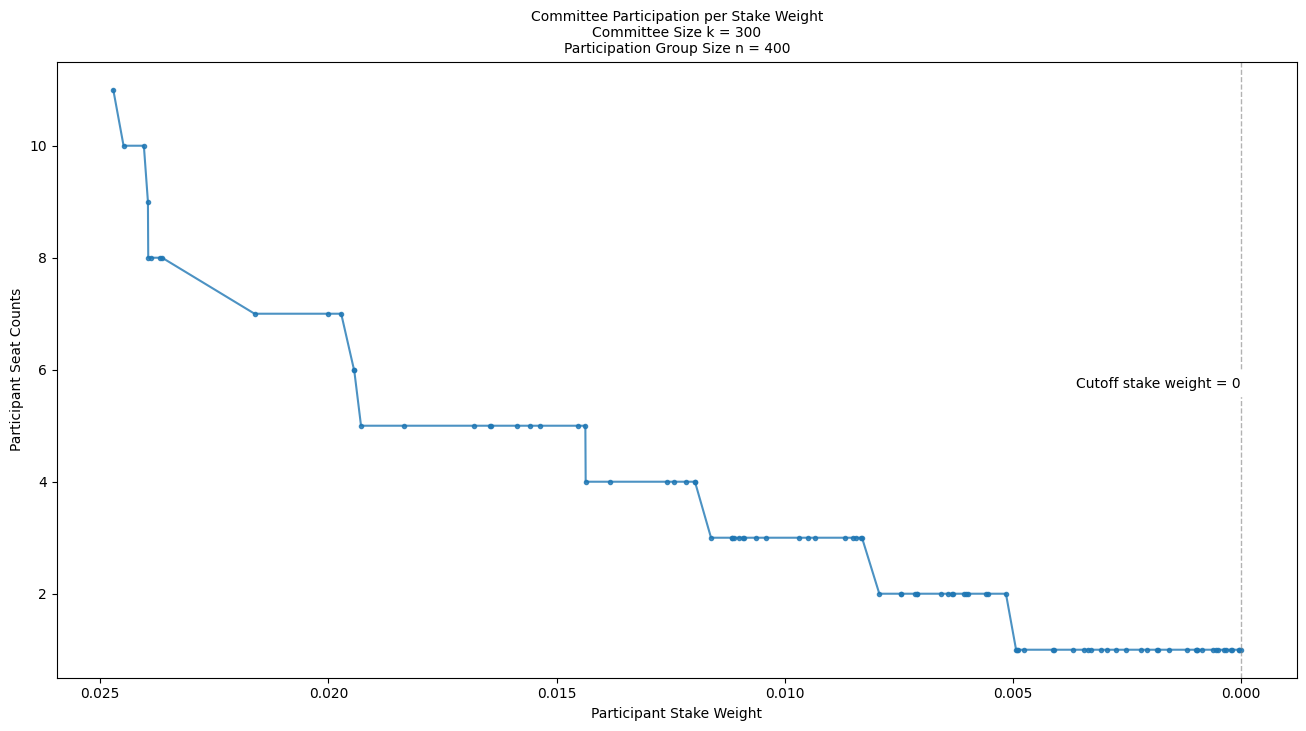

Group Size ...: 500 participants
Committee Size: 300 seats


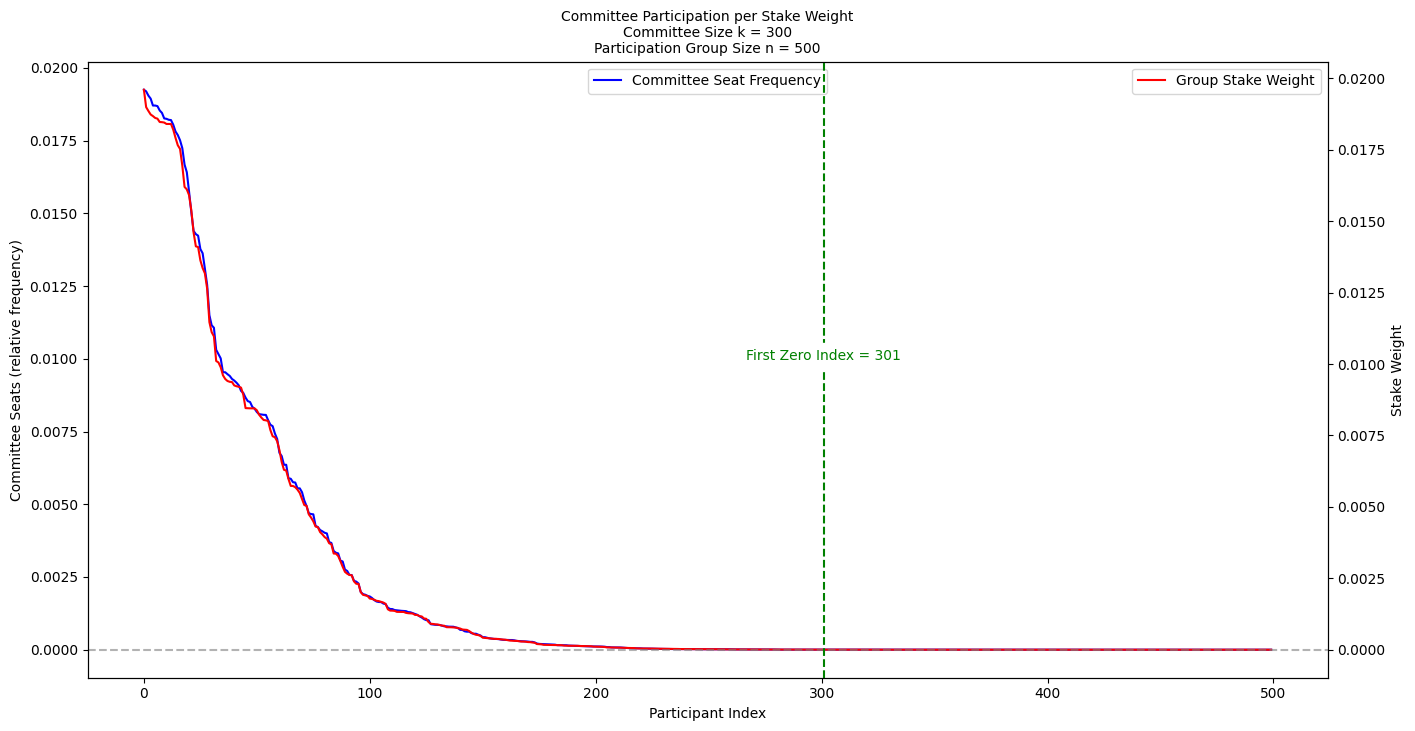

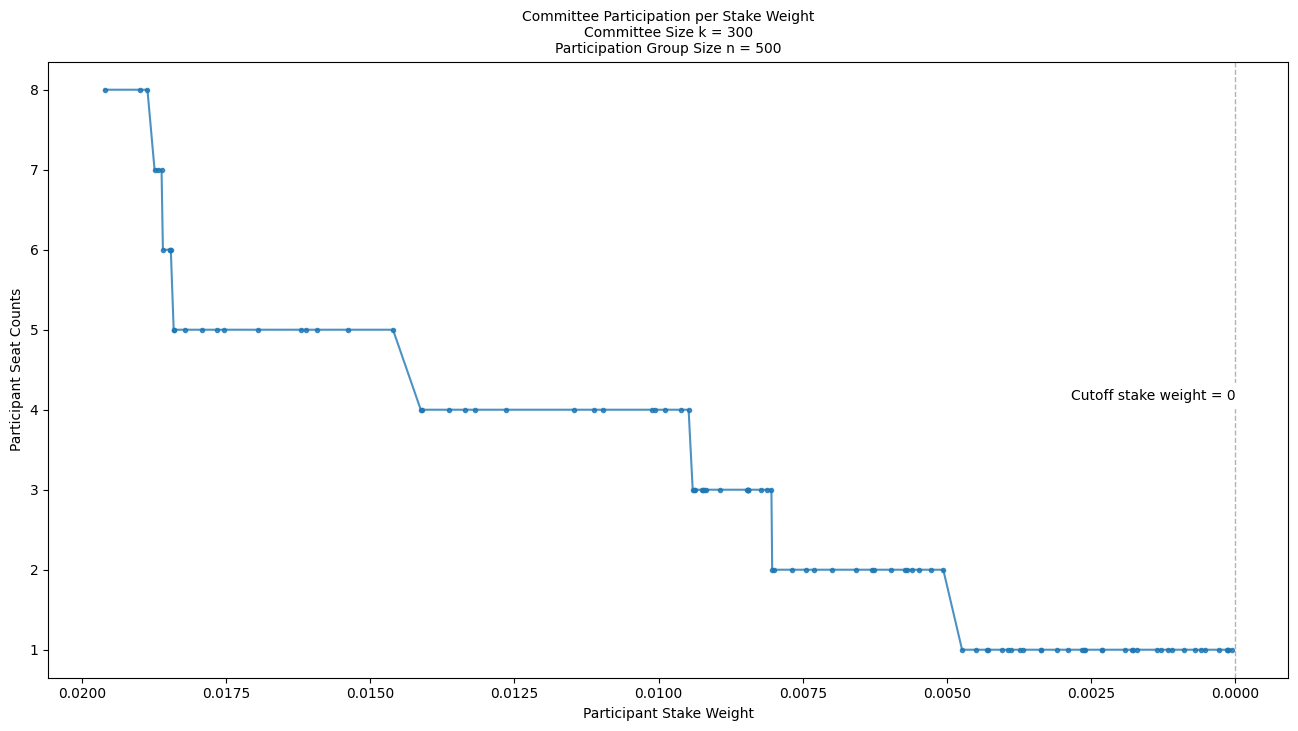

Group Size ...: 100 participants
Committee Size: 400 seats


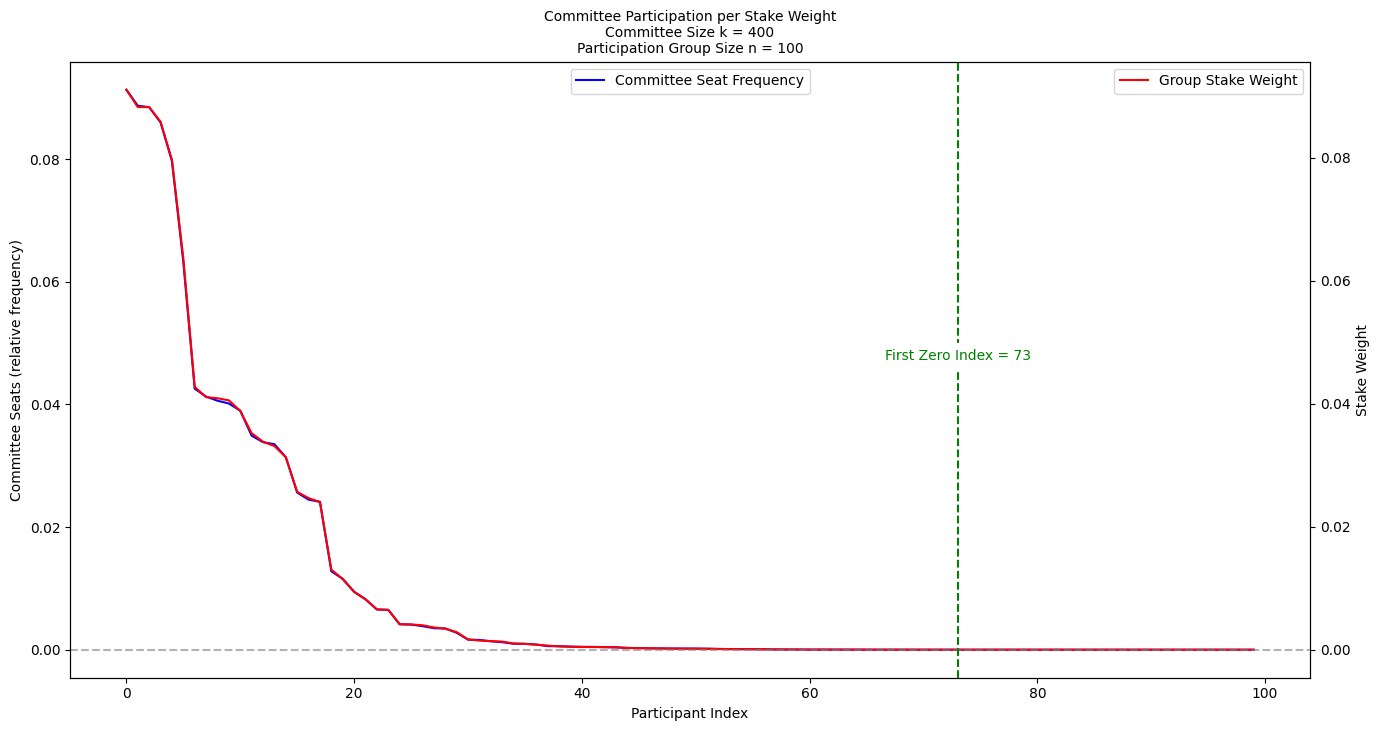

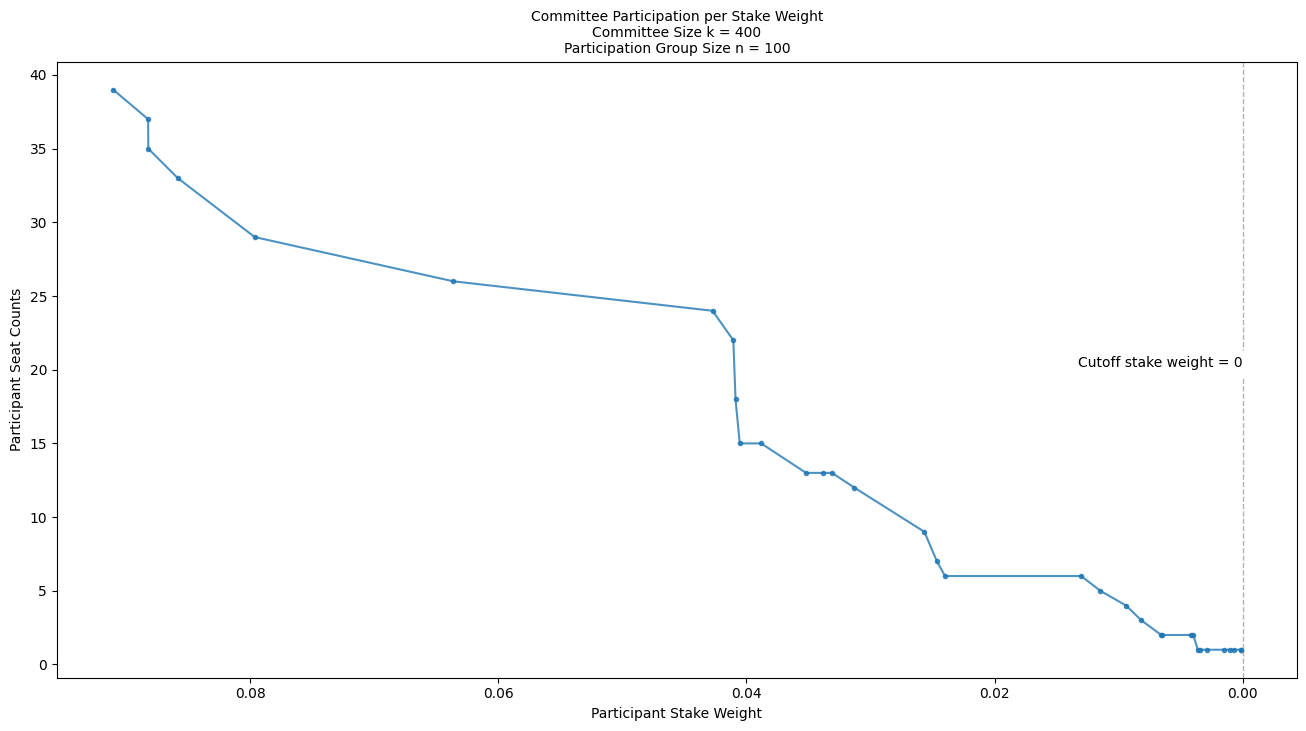

Group Size ...: 200 participants
Committee Size: 400 seats


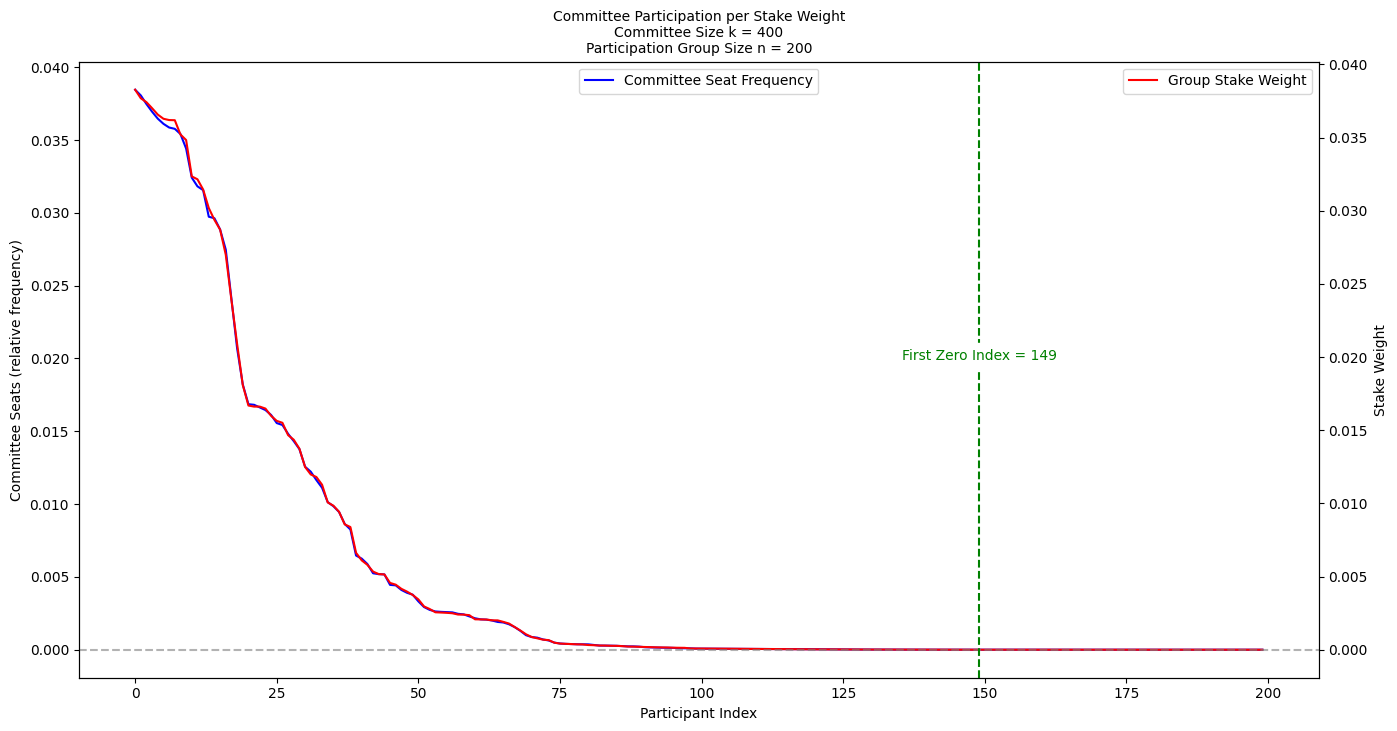

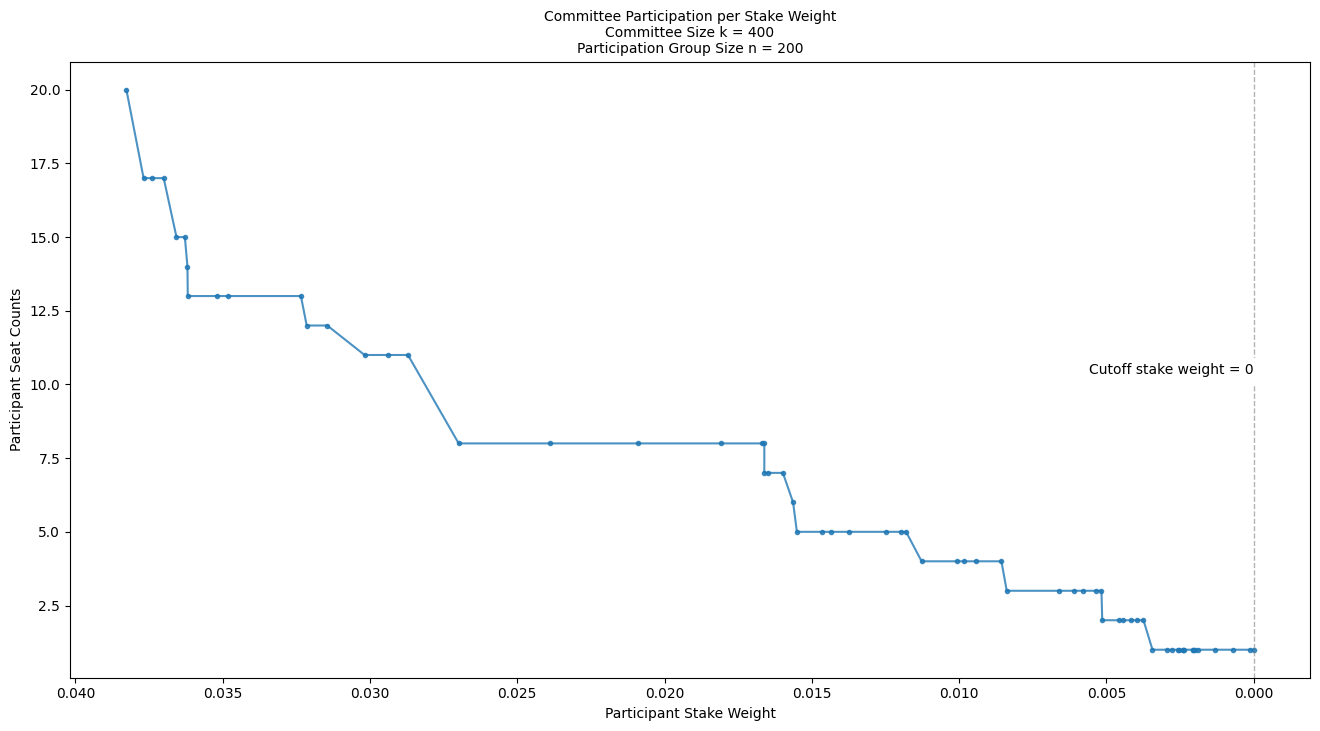

Group Size ...: 300 participants
Committee Size: 400 seats


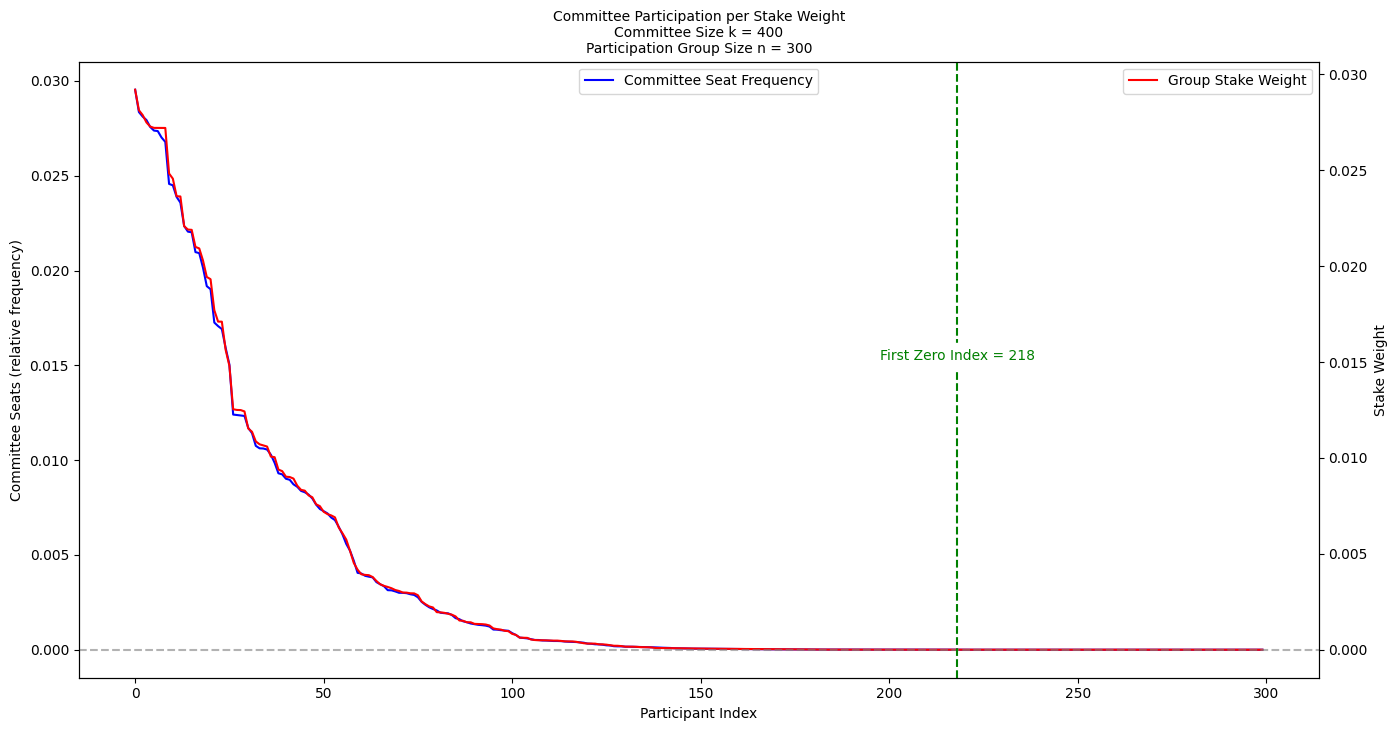

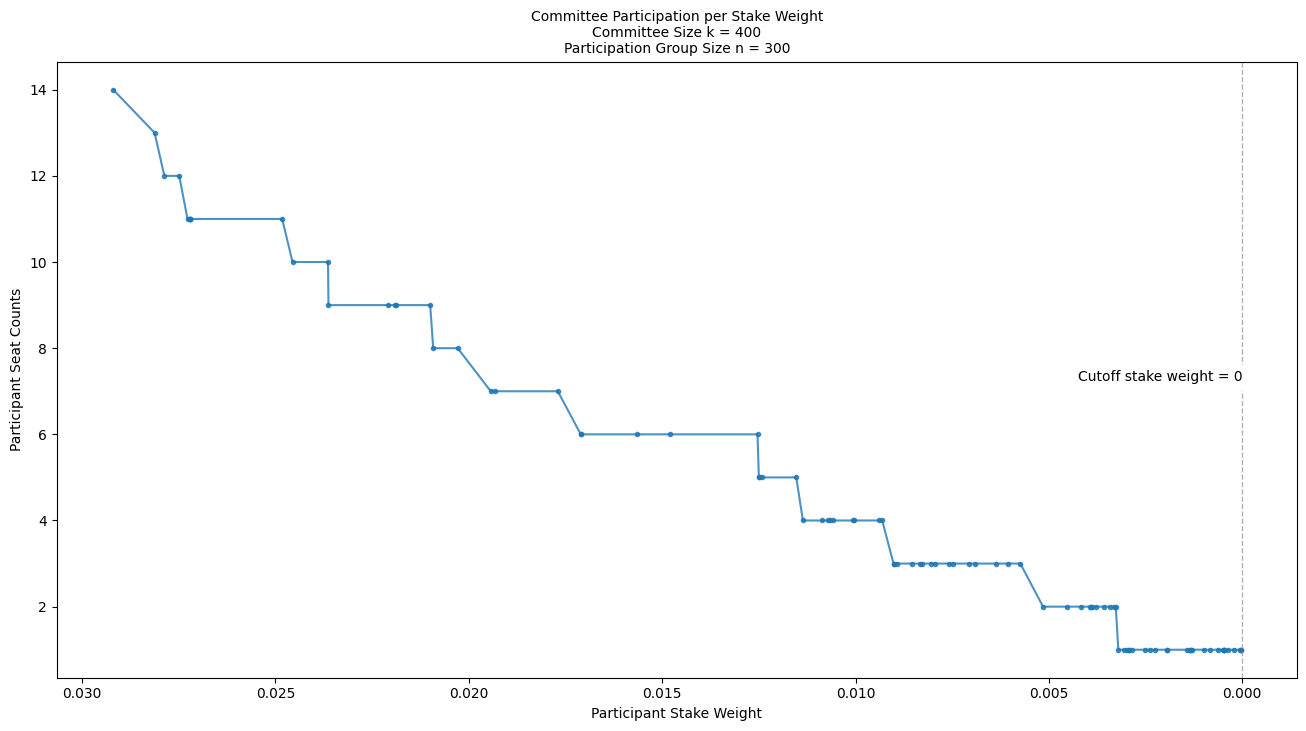

Group Size ...: 400 participants
Committee Size: 400 seats


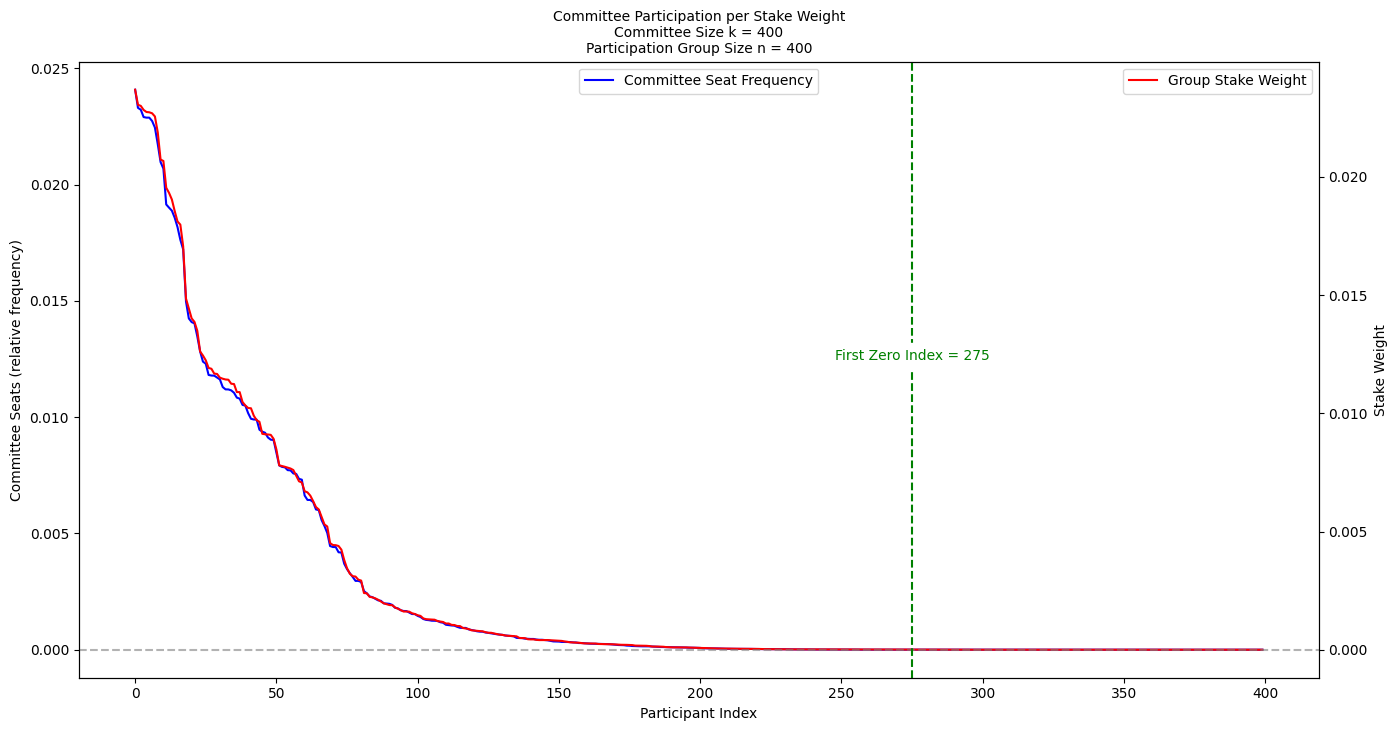

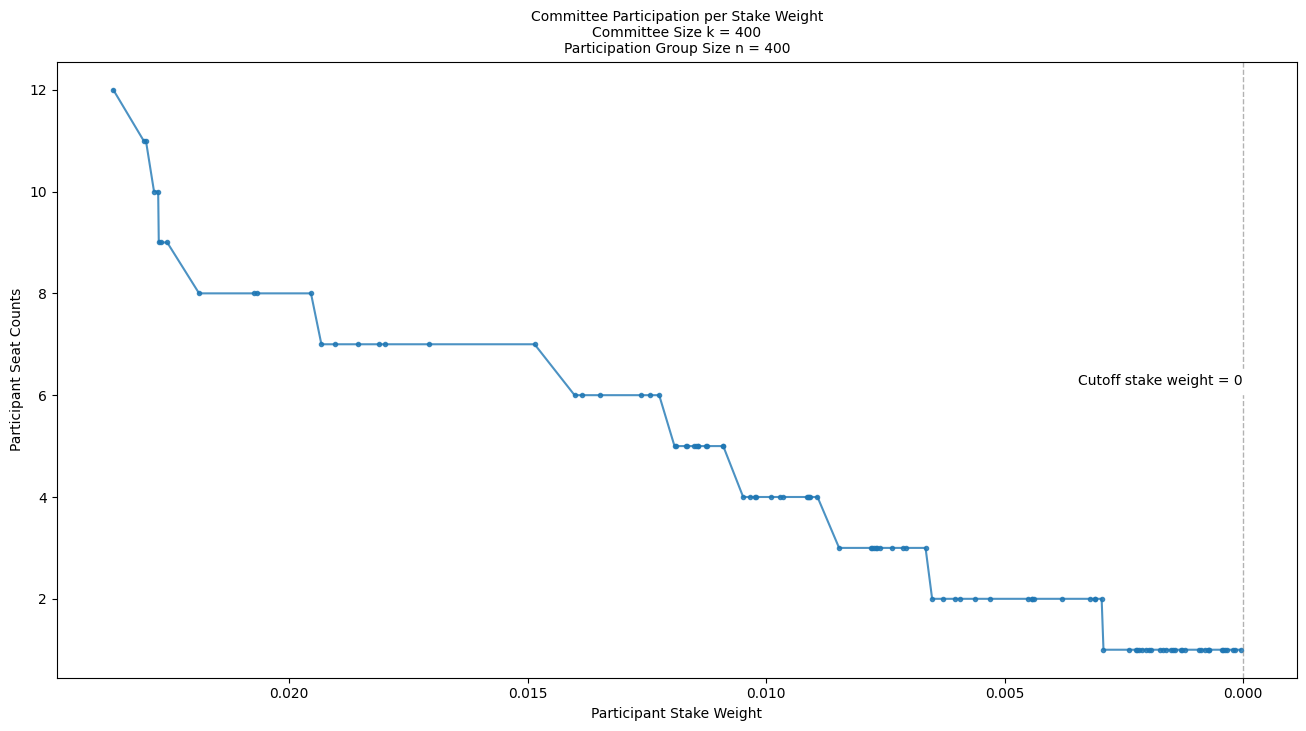

Group Size ...: 500 participants
Committee Size: 400 seats


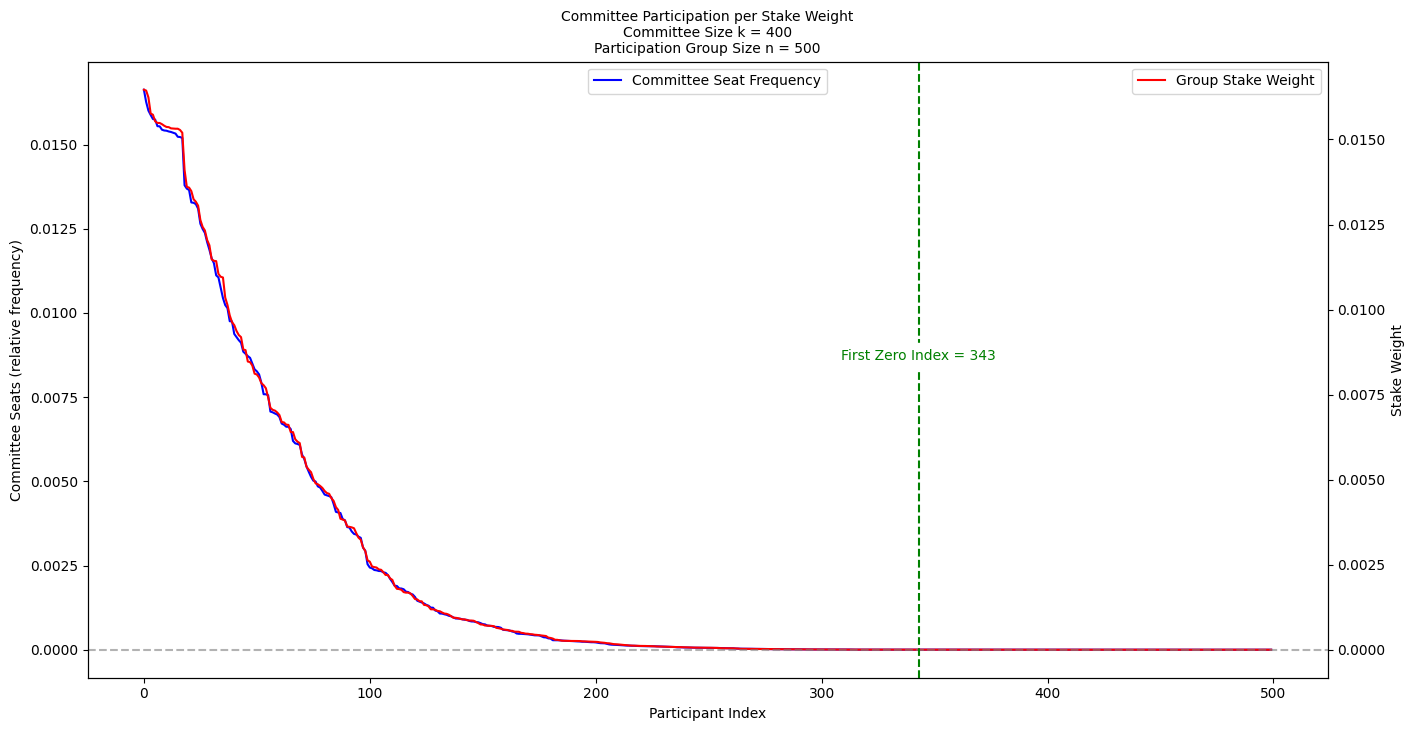

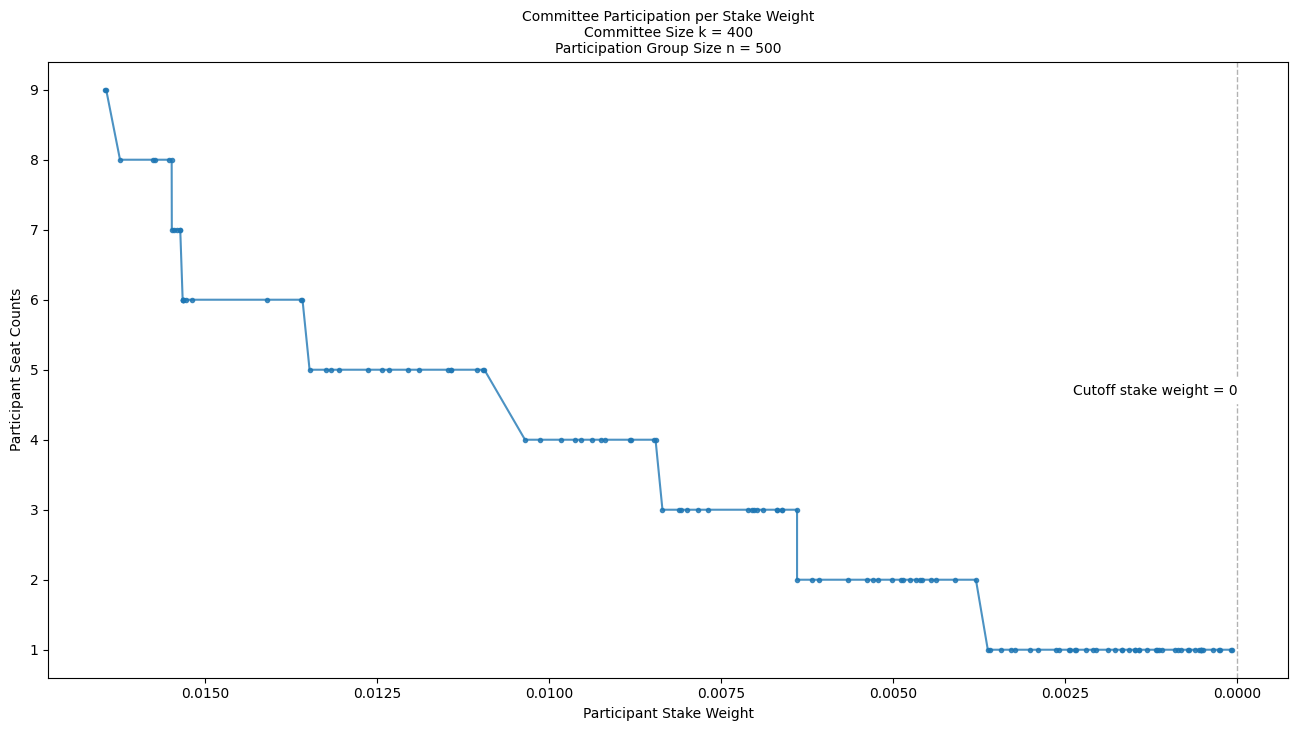

Group Size ...: 100 participants
Committee Size: 500 seats


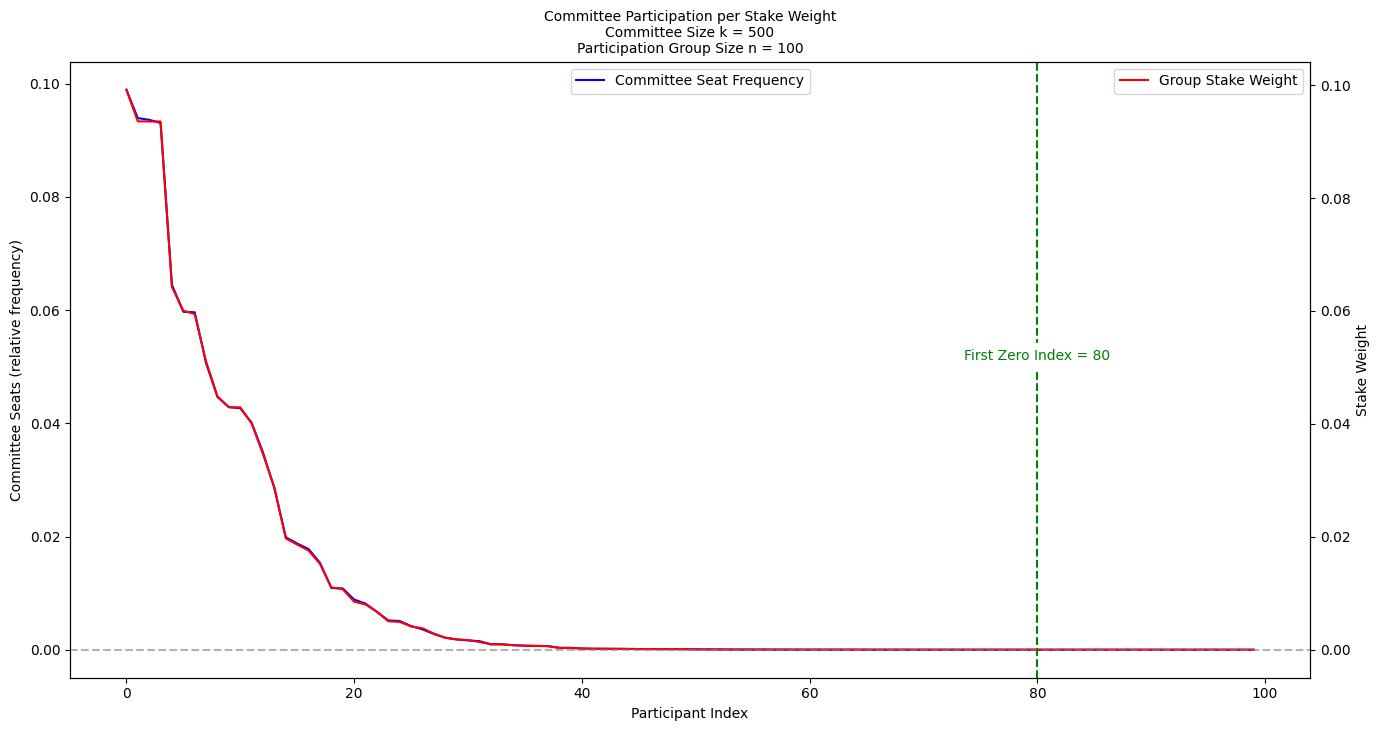

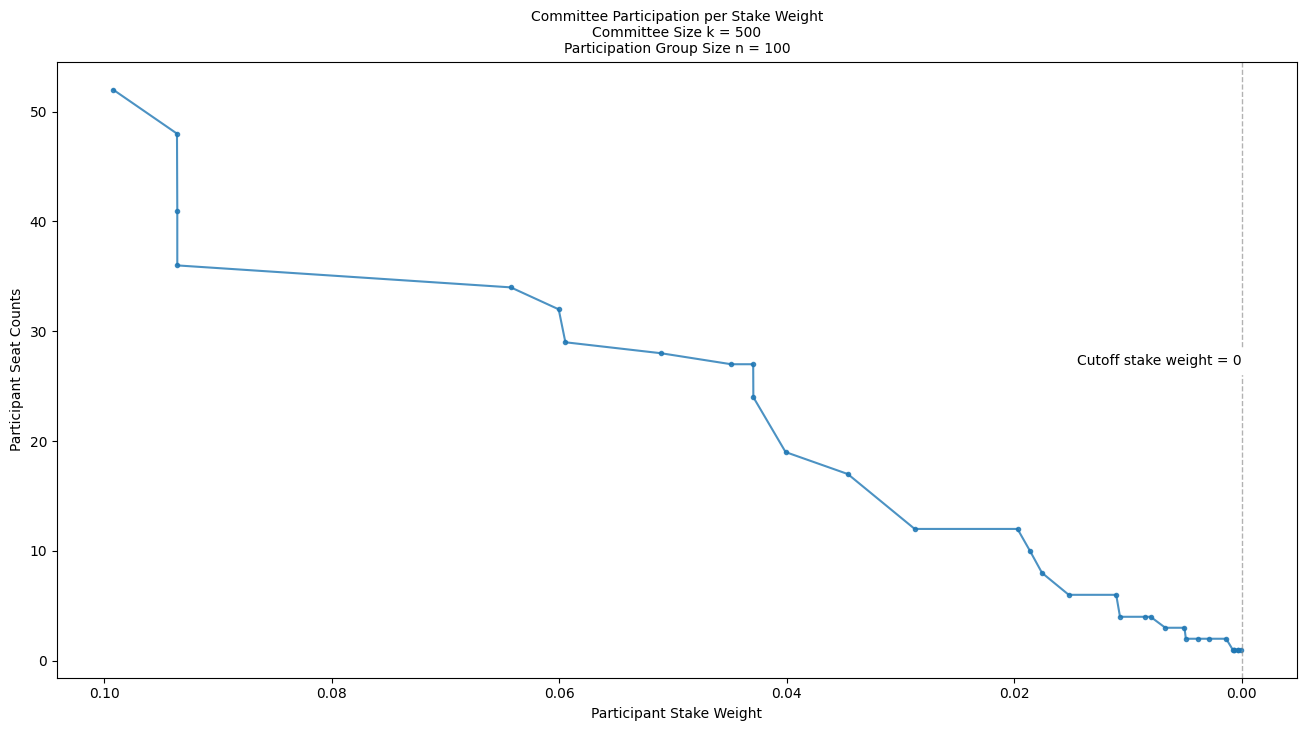

Group Size ...: 200 participants
Committee Size: 500 seats


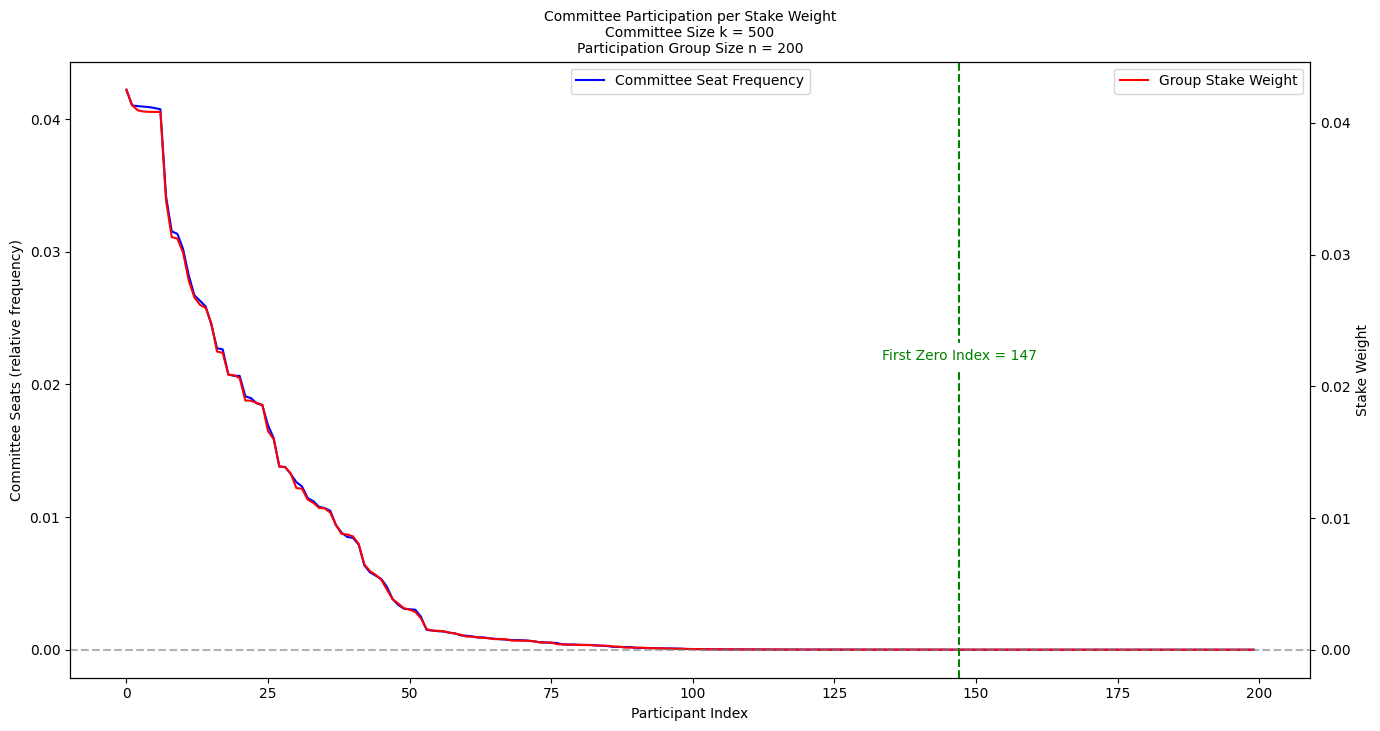

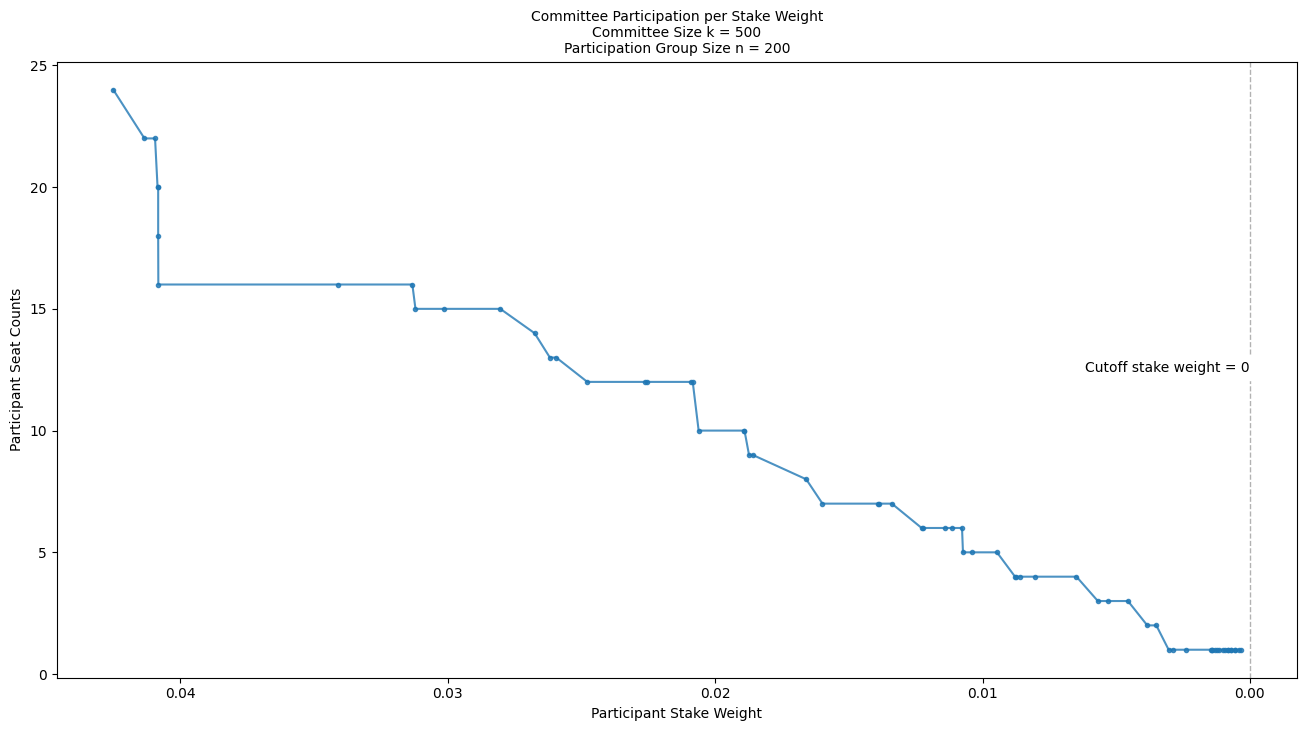

Group Size ...: 300 participants
Committee Size: 500 seats


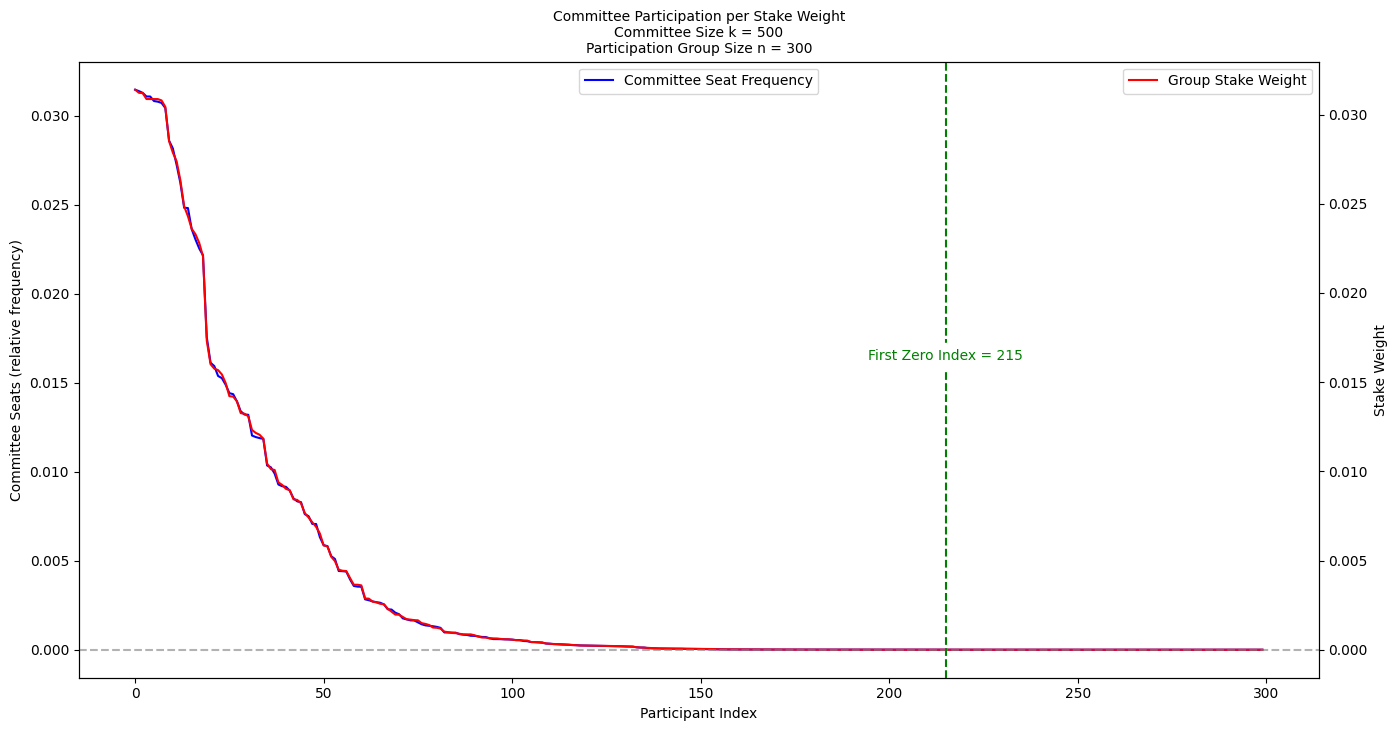

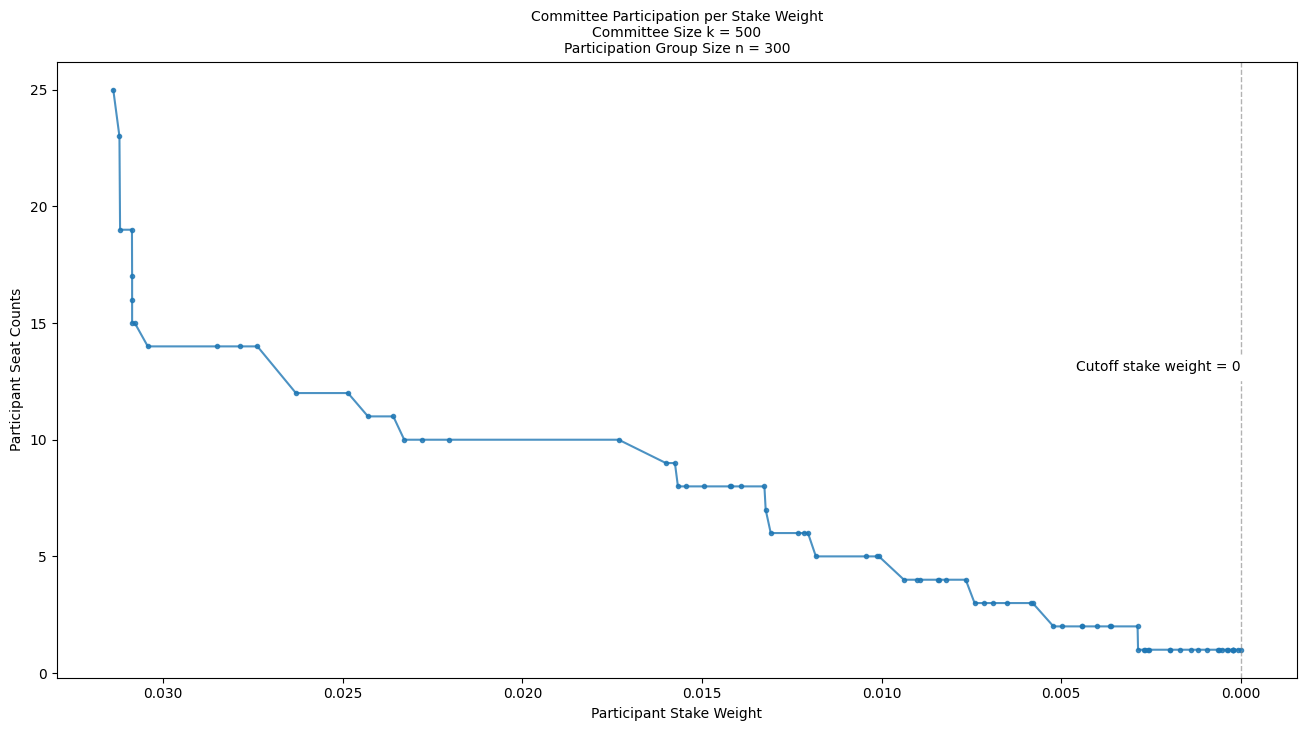

Group Size ...: 400 participants
Committee Size: 500 seats


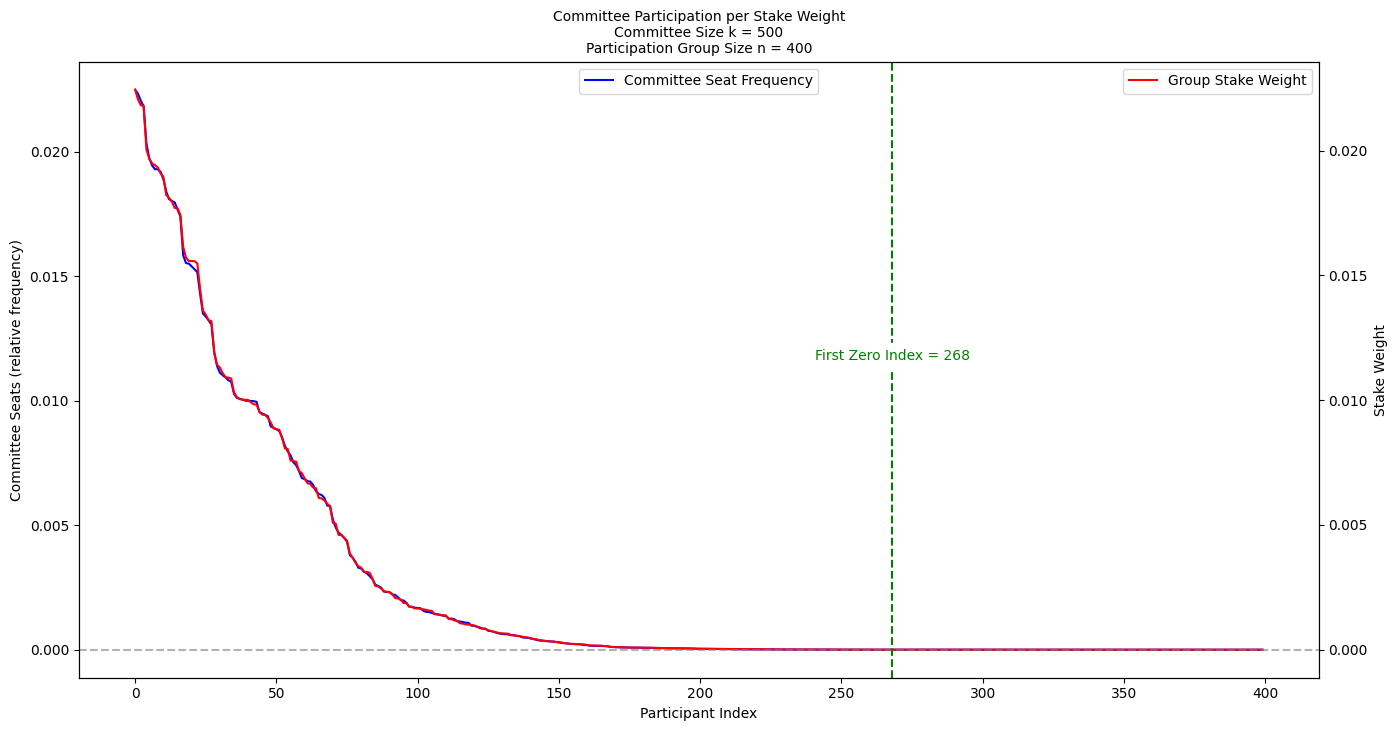

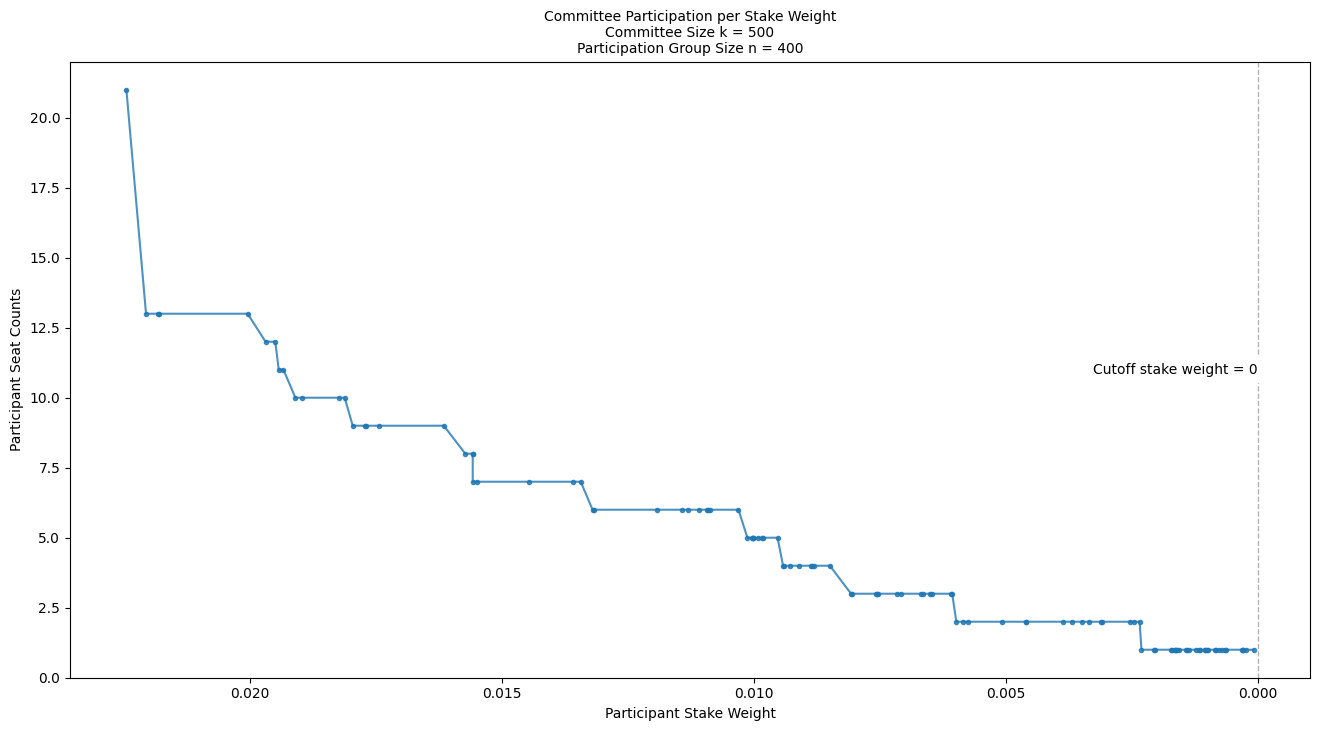

Group Size ...: 500 participants
Committee Size: 500 seats


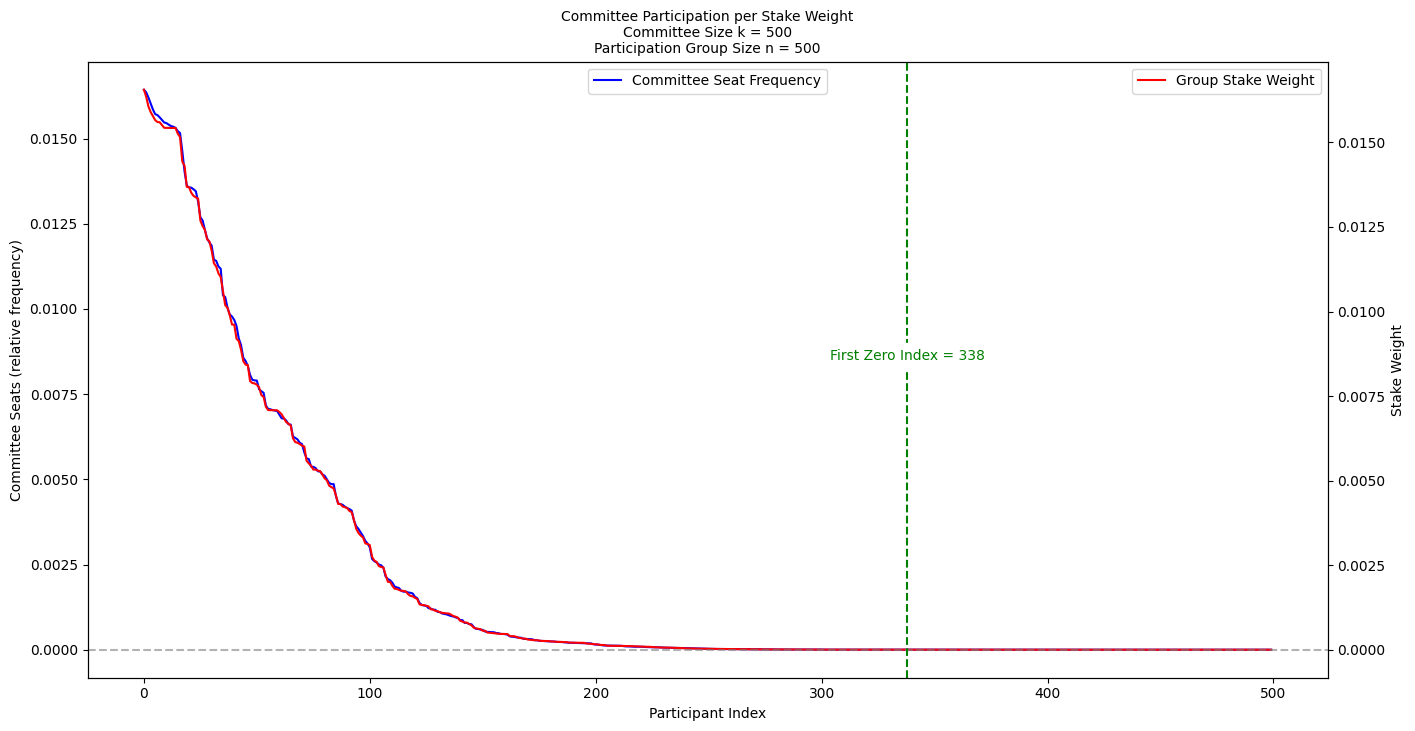

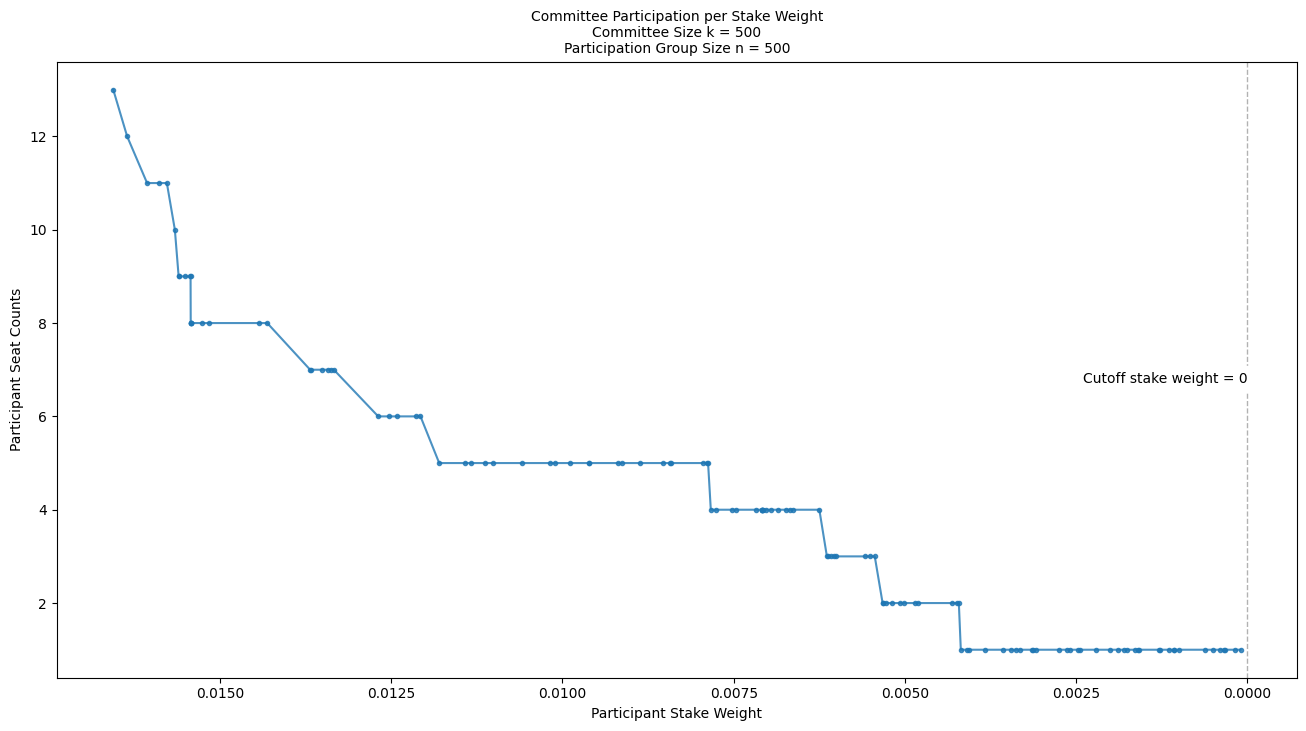

In [ ]:
# %%

# Loop over the committee sizes
for i, committee_size in enumerate(comm_sizes):
    # Loop over the group sizes
    for j, group_size in enumerate(group_sizes):
        print(f"Group Size ...: {group_size} participants")
        print(f"Committee Size: {committee_size} seats")

        group_stakes = get_stake_distribution(
            population,
            group_size,
            num_iter=1,
            plot_it=False,
        )
        committee, seat_counts, first_zero_index = assign_commitee(
            group_stakes,
            committee_size=committee_size,
            num_iter=num_iter,
        )
        first_zero_indices[i][j] = first_zero_index
        selection_counts[f"Group Size = {group_size}"] = seat_counts

        plot_selection_count_vs_stake(
            group_stakes,
            committee,
            first_zero_index,
        )
    # Collect the selection frequencies in a DataFrame
    selection_counts = pd.DataFrame(selection_counts)
    committee_seats[f"Committee Size = {committee_size}"] = selection_counts

In [ ]:
# %%

# I want to combine the selection counts for each committee size
# into a single DataFrame for easier analysis and plotting.
# Make committee size a new column in the DataFrame
committee_seats_df = pd.concat(
    committee_seats,
    axis=1,
)
committee_seats_df

Committee Size = 100                                                     \
        Group Size = 100 Group Size = 200 Group Size = 300 Group Size = 400   
0               0.067845         0.059950         0.033845          0.02261   
1               0.068715         0.058495         0.033610          0.02243   
2               0.067155         0.057850         0.033825          0.02232   
3               0.067555         0.058080         0.033280          0.02143   
4               0.066210         0.048815         0.033235          0.02139   
..                   ...              ...              ...              ...   
495                  NaN              NaN              NaN              NaN   
496                  NaN              NaN              NaN              NaN   
497                  NaN              NaN              NaN              NaN   
498                  NaN              NaN              NaN              NaN   
499                  NaN              NaN              NaN              NaN   

                     Committee Size = 200                                    \
    Group Size = 500     Group Size = 100 Group Size = 200 Group Size = 300   
0           0.016740             0.110023         0.058183         0.032363   
1           0.016370             0.108877         0.057353         0.031813   
2           0.016395             0.091033         0.057610         0.031537   
3           0.016020             0.085087         0.057087         0.030130   
4           0.016050             0.078980         0.058020         0.029650   
..               ...                  ...              ...              ...   
495         0.000000                  NaN              NaN              NaN   
496         0.000000                  NaN              NaN              NaN   
497         0.000000                  NaN              NaN              NaN   
498         0.000000                  NaN              NaN              NaN   
499         0.000000                  NaN              NaN              NaN   

                                       ... Committee Size = 400  \
    Group Size = 400 Group Size = 500  ...     Group Size = 100   
0           0.024580         0.019247  ...             0.098936   
1           0.024490         0.019043  ...             0.093620   
2           0.023550         0.019190  ...             0.093920   
3           0.024257         0.018683  ...             0.093074   
4           0.023930         0.018703  ...             0.064470   
..               ...              ...  ...                  ...   
495              NaN         0.000000  ...                  NaN   
496              NaN         0.000000  ...                  NaN   
497              NaN         0.000000  ...                  NaN   
498              NaN         0.000000  ...                  NaN   
499              NaN         0.000000  ...                  NaN   

                                                                         \
    Group Size = 200 Group Size = 300 Group Size = 400 Group Size = 500   
0           0.042228         0.031282         0.022488         0.016358   
1           0.041044         0.031380         0.022328         0.016434   
2           0.040756         0.031458         0.022052         0.016206   
3           0.040992         0.030788         0.021814         0.015854   
4           0.040954         0.031078         0.020330         0.016032   
..               ...              ...              ...              ...   
495              NaN              NaN              NaN         0.000000   
496              NaN              NaN              NaN         0.000000   
497              NaN              NaN              NaN         0.000000   
498              NaN              NaN              NaN         0.000000   
499              NaN              NaN              NaN         0.000000   

    Committee Size = 500                                                     \
        Group Size = 

<Figure size 1600x800 with 0 Axes>

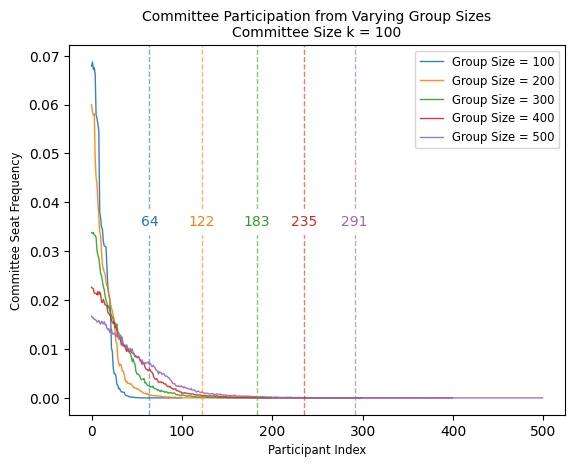

<Figure size 1600x800 with 0 Axes>

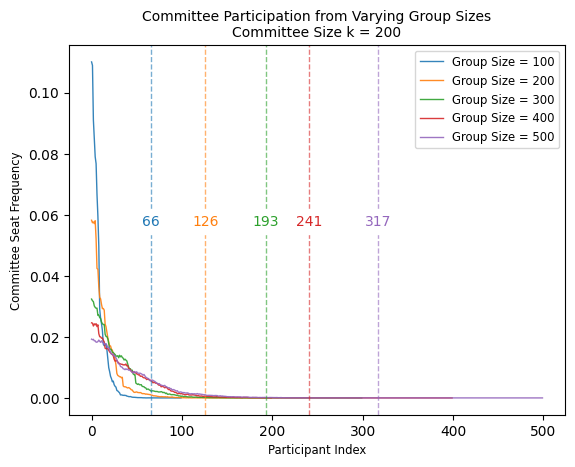

<Figure size 1600x800 with 0 Axes>

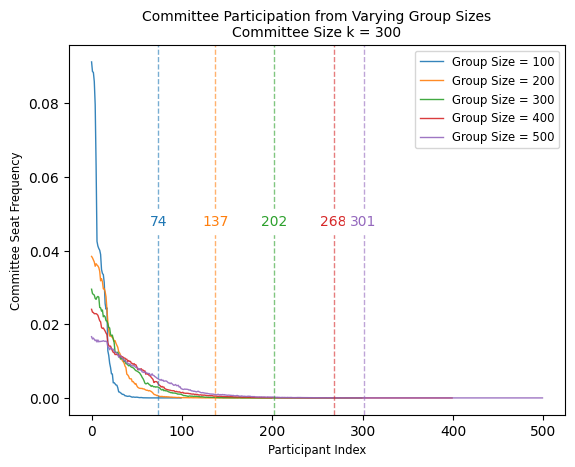

<Figure size 1600x800 with 0 Axes>

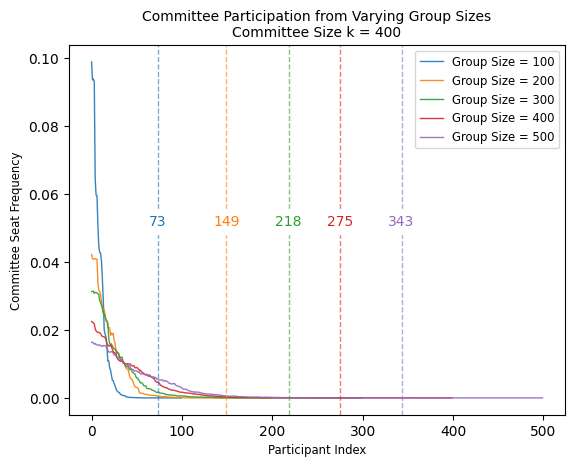

<Figure size 1600x800 with 0 Axes>

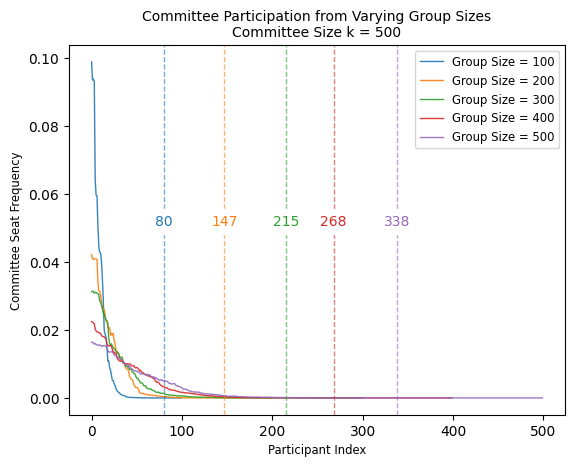

In [ ]:
# %%

# Plot the selection counts for each group size
plot_committee_selection_seat_cutoff(
    comm_sizes,
    committee_seats_df,
    first_zero_indices,
)

# The cutoff stake value is the stake weight of the participant where the
# committee seat count first goes to zero. This is the point where the
# pigeonhole principle applies, showing that some participants with smaller
# stake weights may not get selected for committee seats.
#
# This is expected due to the variation in
# stake weights. The pigeonhole principle helps us understand this
# uneven distribution of selections based on stake weights.

<Figure size 1600x800 with 0 Axes>

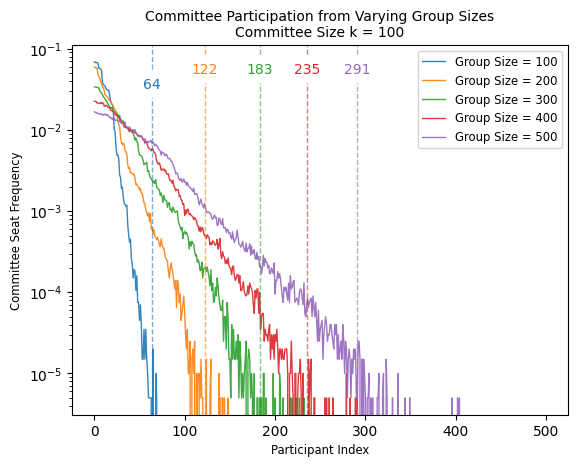

<Figure size 1600x800 with 0 Axes>

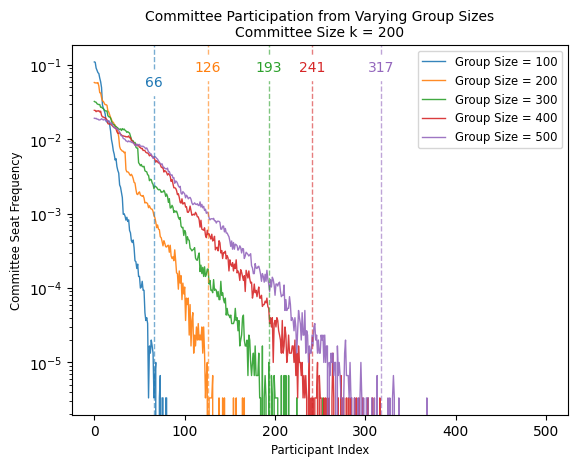

<Figure size 1600x800 with 0 Axes>

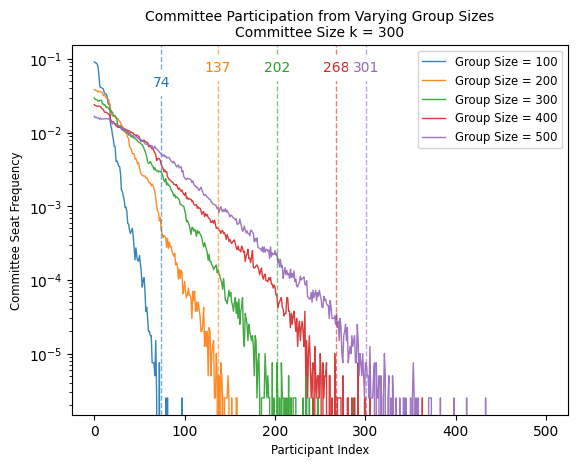

<Figure size 1600x800 with 0 Axes>

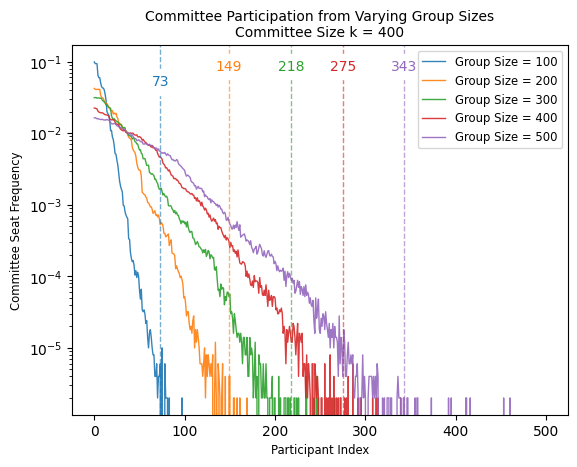

<Figure size 1600x800 with 0 Axes>

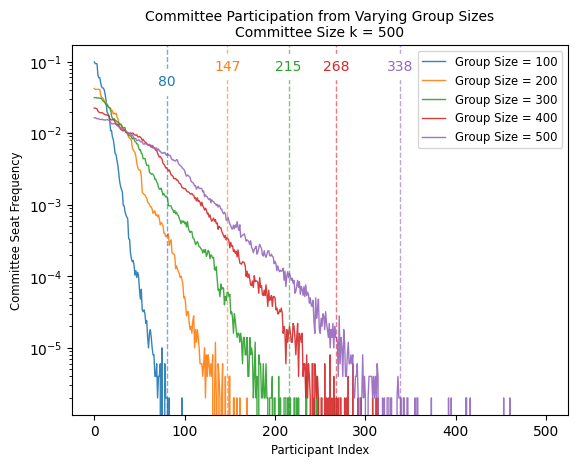

In [ ]:
# %%

# Plot the selection counts for each group size with log scale
plot_committee_selection_seat_cutoff(
    comm_sizes,
    committee_seats_df,
    first_zero_indices,
    log_scale=True,
)
# With the log scale you can see that the distribution of committee seats
# is uneven, with some participants getting selected multiple times while
# others are not selected at all.
#

In [ ]:
# %%

# committee_seats_df = committee_seats_df.swaplevel(axis=1).sort_index(axis=1)

In [ ]:
# %%

# Finally plot a bar chart showing the percentage of group participants
# not selected for committee seats. The x-axis is the group size and the y-axis
# is the Committee Seats (relative frequency). For each group size, 100...500,
# the bars are grouped by committee size.

# Calculate the percentage of participants not selected for committee seats
not_selected_percentages = (1.0 - first_zero_indices / group_sizes) * 100

# Create a DataFrame for plotting
not_selected_df = pd.DataFrame(
    not_selected_percentages,
    index=comm_sizes,
    columns=group_sizes,
)

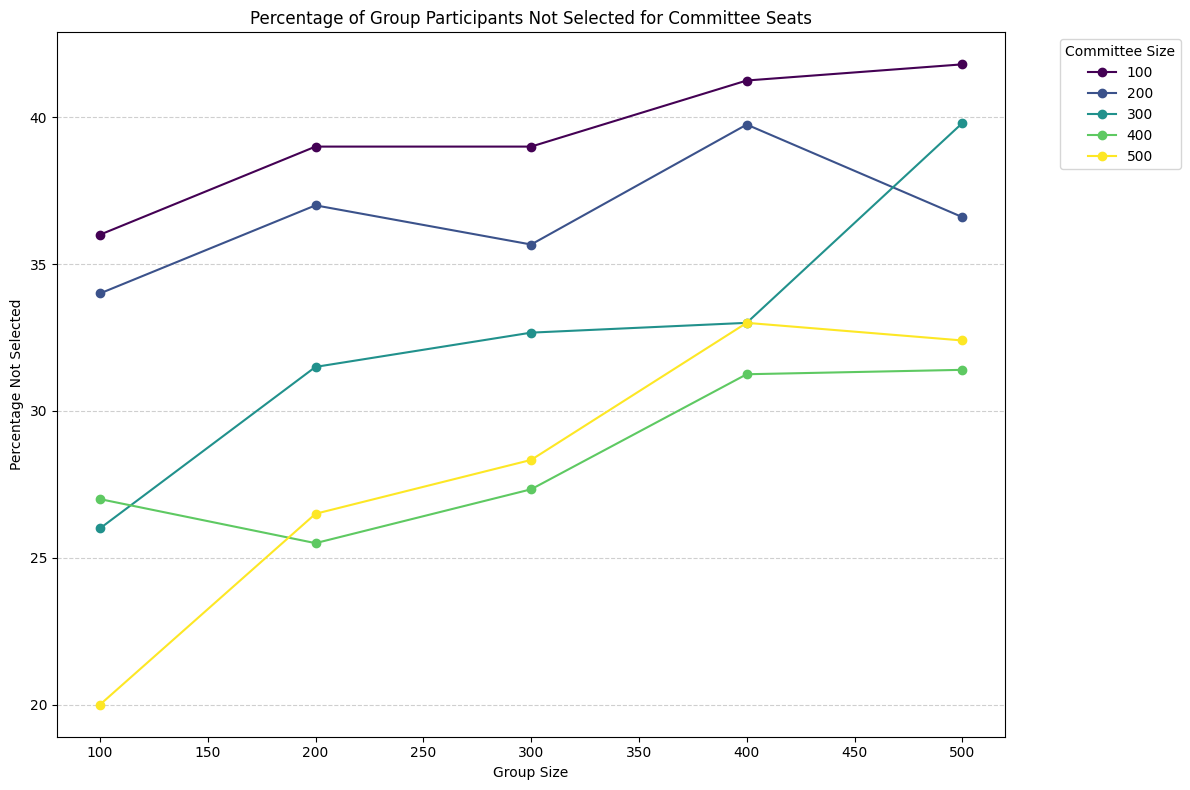

In [ ]:
# %%

# Plot the line chart
not_selected_df.T.plot(kind="line", figsize=(12, 8), marker="o", colormap="viridis")
plt.title("Percentage of Group Participants Not Selected for Committee Seats")
plt.xlabel("Group Size")
plt.ylabel("Percentage Not Selected")
plt.xticks(rotation=0)
plt.legend(title="Committee Size", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

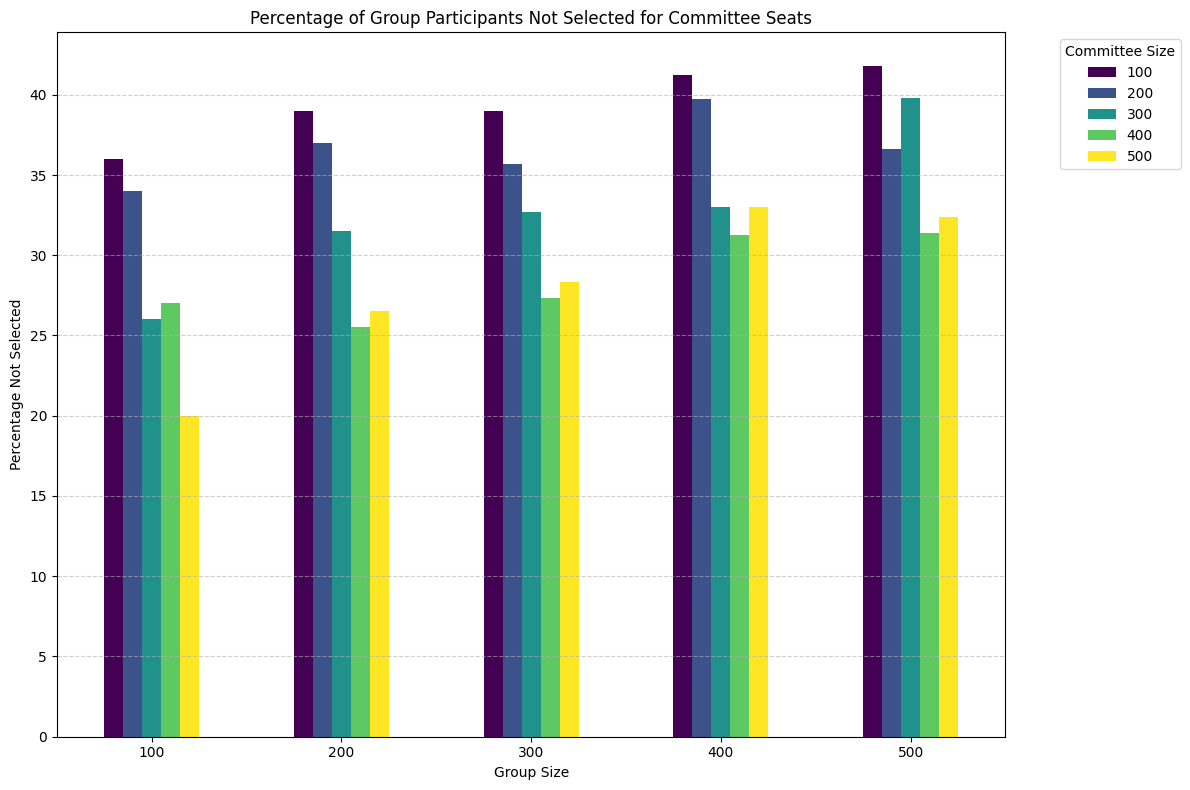

In [ ]:
# %%

# Plot the bar chart
not_selected_df.T.plot(kind="bar", figsize=(12, 8), colormap="viridis")
plt.title("Percentage of Group Participants Not Selected for Committee Seats")
plt.xlabel("Group Size")
plt.ylabel("Percentage Not Selected")
plt.xticks(rotation=0)
plt.legend(title="Committee Size", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

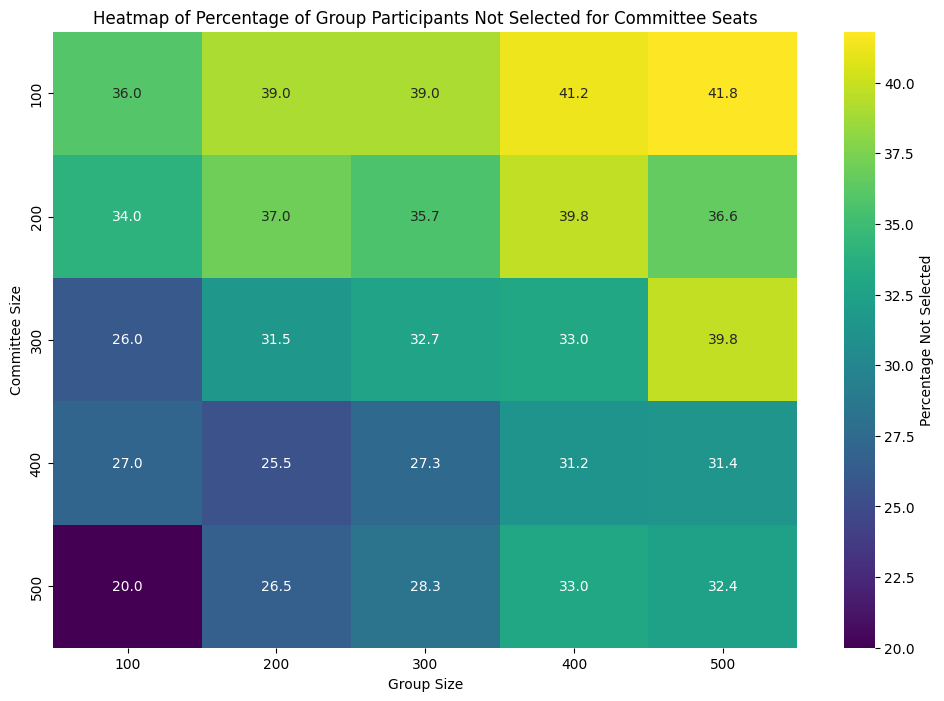

In [ ]:
# %%

# Create a heatmap to visualize the percentage of participants not selected
# for committee seats. This can provide a clear view of the distribution
# across different group sizes and committee sizes.

plt.figure(figsize=(12, 8))
sns.heatmap(
    not_selected_df,
    annot=True,
    fmt=".1f",
    cmap="viridis",
    cbar_kws={"label": "Percentage Not Selected"},
)
plt.title(
    "Heatmap of Percentage of Group Participants Not Selected for Committee Seats"
)
plt.xlabel("Group Size")
plt.ylabel("Committee Size")
plt.show()

### Appendix: Computer Code

In [ ]:
#!/usr/bin/env python
# coding: utf-8

"""
Module: participation_lib

This module performs risk modeling for participation distribution in a
consensus mechanism. It includes functions to load and normalize SPO data,
sample participants based on their stake, and perform Monte Carlo simulations
to analyze the committee seat selection process based on stake weight. The
module also demonstrates the uneven distribution of selections based on stake
weights and the finite committee.

Functions:
- sample_group: Uniformly sample from a population of participants without replacement.
- get_stake_distribution: Collect and plot the stake distribution for a sample group.
- assign_commitee: Assign participants to a committee using random selection based on stake weight.
- plot_group_to_committee_index: Scatter plot of group participant index vs. seat selection index.
- plot_committee_selection_counts: Plot the committee selection counts for varying group sizes.
- plot_selection_count_vs_stake: Plot the seat assignment count vs. stake for a committee.

Author: Rob Jones <robert.jones@shield.io>
Date: 5 Mar 2025

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data import load_data


def sample_group(
    population: pd.DataFrame,
    group_size: int = 300,
) -> pd.DataFrame:
    """
    Uniformly sample from a population of participlants without replacement.
    Only samples groups with nonzero stake is returned.

    Args:
    - population: DataFrame containing the population.
    - group_size: Number of samples to draw.

    Returns:
    - sample: DataFrame of sample of size `group_size` (n).

    """
    sample = population[population.stake > 0].sample(
        group_size,
        replace=False,
    )
    sample["stake_weight"] = sample.stake / sample.stake.sum()
    # Sort by stake weight in descending order
    sample = sample.sort_values("stake_weight", ascending=False)
    return sample


def get_stake_distribution(
    population: pd.DataFrame,
    group_size: int = 300,
    num_iter: int = 1,
    plot_it: bool = True,
    figsize: tuple[int, int] = (16, 8),
) -> pd.DataFrame:
    """ """
    # Let's collect the sample participants.stake.values
    # for every participant in the given sample group size.
    # Average them if num_iter > 1.

    # Initialize an array to store the sum of stakes for each participant
    stakes = np.zeros(group_size)
    for n in range(num_iter):
        participants = sample_group(population, group_size)
        # Add the stakes of the current iteration to the stake_sums array
        stakes += participants.stake.values

    if num_iter > 1:
        # Calculate the average stakes
        stakes = pd.DataFrame(stakes / num_iter, columns=["stake"])
    else:
        stakes = pd.DataFrame(stakes, columns=["stake"])

    min_stake = stakes.stake.min()
    max_stake = stakes.stake.max()

    if plot_it:
        # Plot the stake for each participant number 1 to group_size
        plt.figure(figsize=figsize)
        plt.plot(
            stakes.stake.values,
            marker=".",
            linestyle="-",
            alpha=1,
            color="red",  # Color for the average curve
            linewidth=2,
            markersize=3,
            label="Average Stake",
        )

        # Draw a horizontal line at maximum stake value
        plt.axhline(
            y=max_stake,
            color="blue",
            linestyle="--",
            alpha=0.6,
            label=f"Max. Stake = {max_stake}",
        )

        # Draw a horizontal line at minimum stake value
        plt.axhline(
            y=min_stake,
            color="green",
            linestyle="--",
            alpha=0.6,
            label=f"Min. Stake = {min_stake}",
        )

        plt.legend()
        plt.title(f"Stake for each Participant (1 to {group_size})")
        plt.xlabel("Participant Number")
        plt.ylabel("Stake")
        plt.show()

    # Add the stake weight column to the DataFrame
    stakes["stake_weight"] = stakes.stake / stakes.stake.sum()

    return stakes


def assign_commitee(
    group: pd.DataFrame,
    committee_size: int = 300,
    alpha: float = 0.0,
    num_iter: int = 1000,
    figsize: tuple[int, int] = (16, 8),
) -> tuple[pd.DataFrame, pd.Series, int]:
    """
    Assumes participants in a given group of size group_size are assigned to
    a committee using random selection with replacement based on their stake
    weight. The committee has a fixed size equal to the group_size. As such,
    partipants with larger stake-weight will occupy multiple committee seats.
    We perform Monte Carlo simulation of multiplle committee selections, thus
    repeated for the given number of iterations.

    Args:
    - group: DataFrame containing the group of participants, assumed size n.
    - committee_size: Size of the committee (k).
    - alpha: Probability of uniform random sampling in a mixture model.
    - num_iter: Number of iterations for Monte Carlo simulation.
    - figsize: Size of the figure.

    Returns:
    - committee: DataFrame containing the committee members.
    - seat_counts: Series containing the committee seat relative frequency.
    - first_zero_index: Index where the seat count first goes to zero.

    """
    group_size = group.shape[0]  # size n

    # Initialize an array to store the number of
    # committee seats per participant
    seat_counts = pd.Series(
        np.zeros(group_size, dtype="int64"),
        name="relative frequency",
    )

    for n in range(num_iter):
        #
        # Select a committee based on the stake weight of each
        # participant stake holder.
        #
        committee = group.sample(
            n=committee_size,
            weights="stake_weight",
            replace=True,
        )

        # Count the number of times each participant is selected
        # for a committee seat
        participant_counts = committee.index.value_counts()

        # Reindex participant_counts to match sum_counts index
        # and fill missing values with 0
        participant_counts = participant_counts.reindex(
            seat_counts.index,
            fill_value=0,
        )

        # Add the counts to the sum_counts array
        seat_counts += participant_counts

    # Normalize the sum_counts by total sum of counts
    seat_counts /= seat_counts.sum()

    # Sort the sum_counts in descending order
    seat_counts.sort_values(ascending=False, inplace=True)

    # Get the index of sum_counts where the value is first zero
    first_zero_index = group.index[: -seat_counts[seat_counts == 0.0].shape[0]].max()

    # Let's plot both group and sum_counts with two y-axes,
    # one for each
    fig, ax1 = plt.subplots(figsize=figsize)
    ax2 = ax1.twinx()
    ax1.plot(seat_counts.values, color="blue", label="Committee Seat Frequency")
    ax2.plot(group.stake_weight.values, color="red", label="Group Stake Weight")
    ax1.set_ylabel("Committee Seats (relative frequency)")
    ax2.set_ylabel("Stake Weight")
    ax1.set_xlabel("Participant Index")
    ax1.legend(loc="upper center")
    ax2.legend(loc="upper right")
    plt.title(
        f"Committee Participation per Stake Weight\n"
        f"Committee Size k = {committee_size}\n"
        f"Participation Group Size n = {group_size}",
        fontsize="medium",
    )
    plt.axhline(y=0, color="gray", linestyle="--", alpha=0.6)
    # Draw vertical line where the committee seat count first goes to zero
    plt.axvline(x=first_zero_index, color="green", linestyle="--")
    # Print the value of this first_zero_index along the center of the
    # vertical line
    plt.text(
        first_zero_index,
        ax2.get_ylim()[1] / 2.0,
        f"First Zero Index = {first_zero_index}",
        rotation=0,
        verticalalignment="center",
        horizontalalignment="center",
        color="green",
        backgroundcolor="white",
    )
    plt.show()

    return committee, seat_counts, first_zero_index


def plot_group_to_committee_index(
    seat_counts: pd.Series,
    figsize: tuple[int, int] = (6, 6),
):
    """
    A simple scatter plot of the two series indexes
    to see how they align.

    Args:
    - seat_counts: Series containing the committee seat counts
      indexed by participant index.
    - figsize: Size of the figure.

    """
    plt.figure(figsize=figsize)
    plt.scatter(
        np.arange(len(seat_counts)),
        seat_counts.index,
        marker=".",
        color="green",
    )
    plt.xlabel("Group Participant Index")
    plt.ylabel("Seat Selection Participant Index")
    plt.title("Seat Selection Index vs. Participant Index")
    plt.legend()
    plt.show()


# Plot the selection counts for each group size
def plot_committee_selection_counts(
    committee_size: int,
    selection_counts: pd.DataFrame,
    first_zero_indices: np.ndarray,
    log_scale: bool = True,
    figsize: tuple[int, int] = (16, 8),
):
    """
    Plot the committee selection counts for varying group sizes.

    Args:
    - committee_size: Size of the committee (k).
    - selection_counts: DataFrame containing the committee seat relative frequency.
    - first_zero_indices: Array containing the first zero index for each group size.
    - log_scale: Boolean flag to set the y-axis to log scale.
    - figsize: Size of the figure.

    """
    plt.figure(figsize=figsize)
    selection_counts.plot(
        marker="",
        linestyle="-",
        linewidth=1,
        alpha=0.9,
    )
    for i, cutoff in enumerate(first_zero_indices):
        plt.axvline(
            x=cutoff,
            color=plt.gca().lines[i].get_color(),
            linestyle="--",
            linewidth=1,
            alpha=0.6,
        )
        # Print the value of this cutoff value
        # along the center of the vertical line
        plt.text(
            cutoff,
            plt.gca().get_ylim()[1] / 2.0,
            f"{int(cutoff)}",
            rotation=0,
            verticalalignment="center",
            horizontalalignment="center",
            color=plt.gca().lines[i].get_color(),
            backgroundcolor="white",
            fontsize="medium",
        )
        if log_scale:
            plt.yscale("log")

    plt.legend(fontsize="small")
    plt.xlabel("Participant Index", fontsize="small")
    plt.ylabel("Committee Seat Frequency", fontsize="small")
    plt.title(
        f"Committee Participation from Varying Group Sizes\n"
        f"Committee Size k = {committee_size}",
        fontsize="medium",
    )
    plt.show()


def plot_selection_count_vs_stake(
    group_stakes: pd.DataFrame,
    committee_seats: pd.DataFrame,
    first_zero_index: int,
    figsize: tuple[int, int] = (16, 8),
):
    """
    Plot the seat assignment count vs. stake for a committee
    of a given size.

    Args:
    - group_stakes: DataFrame containing the stake weight of each participant.
    - committee_seats: DataFrame containing the committee members.
    - first_zero_index: Index where the seat count first goes to zero.
    - figsize: Size of the figure.

    """
    committee_size = committee_seats.shape[0]
    group_size = group_stakes.shape[0]
    cutoff = group_stakes.loc[first_zero_index, "stake_weight"]

    # Count the number of seats each participant has in the committee
    participant_counts = committee_seats.index.value_counts()
    assert participant_counts.index.is_unique

    # Align committee_members with participant_counts
    committee_members = group_stakes.loc[participant_counts.index].sort_values(
        by="stake_weight", ascending=False
    )

    x = committee_members.stake_weight.values
    y = participant_counts.values

    # Plot selection seat count vs. stake
    plt.figure(figsize=figsize)
    plt.plot(
        x,
        y,
        marker=".",
        linestyle="-",
        alpha=0.8,
    )
    plt.gca().invert_xaxis()
    plt.xlabel("Participant Stake Weight")
    plt.ylabel("Participant Seat Counts")
    plt.title(
        "Committee Participation per Stake Weight\n"
        f"Committee Size k = {committee_size}\n"
        f"Participation Group Size n = {group_size}",
        fontsize="medium",
    )
    plt.axvline(
        x=cutoff,
        color="gray",
        linestyle="--",
        linewidth=1,
        alpha=0.6,
    )
    # Print the value of this cutoff value along the center of the vertical line
    plt.text(
        cutoff,
        plt.gca().get_ylim()[1] / 2.0,
        f"Cutoff stake weight = {int(cutoff)}",
        rotation=0,
        verticalalignment="center",
        horizontalalignment="right",
        color="black",
        backgroundcolor="white",
        fontsize="medium",
    )
    plt.show()


def plot_committee_selection_seat_cutoff(
    committee_sizes: list,
    committee_seats_df: pd.DataFrame,
    first_zero_indices: np.ndarray,
    log_scale: bool = False,
):
    """
    Plot the committee selection counts for each group size.

    Args:
    - committee_sizes: list of committee sizes
    - committee_seats_df: DataFrame of committee selection counts
    - first_zero_indices: array of first zero indices
    - log_scale: whether to use log scale for the plot

    Returns:
    - None

    """
    # Loop over the committee sizes
    for i, committee_size in enumerate(
        committee_seats_df.columns.get_level_values(0).unique()
    ):
        plot_committee_selection_counts(
            committee_size=committee_sizes[i],
            selection_counts=committee_seats_df[committee_size],
            first_zero_indices=first_zero_indices[i],
            log_scale=log_scale,
        )